README:
    1. Generate seperate plots for unique combinations of: PRDS, METHOD#, Parameter Name, Manufacture Building, Test Site
    2.Moving Average plot: limited to parameters w/ >50 batches; can be changed
    3. moving window=20; can be changed
    4. Test Site: extracted from the last 3 letters of "unit procedure"
    5. This is the most up-to-date script for rolling chart in this folder.

Blincyto: All parameter-unit have less than 30 lots--->width of the running window=5

In [1]:
import pandas as pd
import numpy as np

In [2]:
import datetime

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages('multipage.pdf')

#plt.savefig(pp, format='pdf')

#pp.savefig()

#pp.close()


In [5]:
from APRGenerator import APR_analytical_pipeline as apr

In [6]:
def parse_date(string):
    return(string[:10])

def parse_test(string):
    return(string[-3:])

def parse_mfg(string):
    return(string.split("-")[0])

In [7]:
program="Blincyto"
file_path="blincyto-all.csv"

In [8]:
pipeline=apr(program, file_path)

In [9]:
df=pd.read_csv("blincyto-all.csv")

In [12]:
df.shape

(729, 36)

In [17]:
df.columns

Index(['unit procedure', 'sampling point', 'parameter name',
       'parameter detail', 'run number', 'batch number', 'date of manufacture',
       'process start', 'parameter date', 'local id', 'value_text(reported)',
       'value_num(recorded/full precision)', 'uom', 'lal', 'ual', 'lcl', 'ucl',
       'lrl', 'ucl.1', 'cl', 'nel1', 'nel2', 'nel3', 'nel4', 'ppk',
       'control_precision', 'action_precision', 'rejection_precision', 'scale',
       'summary table', 'disposition_date', 'result type', 'source_system',
       'ctrl_violation', 'action_violation', 'rej_violation'],
      dtype='object')

In [10]:
df2=pd.read_csv("blincyto-atleast30.csv")

df["test_site"]=pd.Series(list(map(parse_test,df["unit procedure"])))

In [18]:
df=pipeline.df_colname_unify(df)

df=pipeline.specs_num_conversion(df)

In [19]:
quan_list=pipeline.quanti_quali_namelists(df)[0]

In [20]:
df_quan=df[df["parameter name"].isin(quan_list)].copy()

In [21]:
df_quan.shape

(351, 36)

In [25]:
para_unit_pair_df=pipeline.para_unit_combi_df(df_quan)

In [44]:
df_quan=pipeline.spec_correction_rawset(df_quan)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
df_quan=df_quan.sort_values(["parameter name","unit procedure",\
                             "date of manufacture",'batch number'])
df_quan=df_quan.reset_index(drop=True)

In [27]:
len(para_unit_pair_df)

65

In [40]:
list(map(parse_date,df_quan["date of manufacture"]))

['2015-11-28',
 '2016-11-23',
 '2017-04-21',
 '2017-08-25',
 '2018-02-09',
 '2018-07-06',
 '2014-10-06',
 '2014-11-07',
 '2016-10-07',
 '2016-10-13',
 '2016-10-24',
 '2018-04-24',
 '2018-04-25',
 '2014-07-13',
 '2014-12-15',
 '2015-07-15',
 '2016-05-13',
 '2016-08-22',
 '2018-02-20',
 '2018-09-13',
 '2013-05-23',
 '2014-10-06',
 '2015-11-28',
 '2016-11-23',
 '2017-04-21',
 '2017-08-25',
 '2018-02-09',
 '2018-07-06',
 '2013-04-23',
 '2013-05-23',
 '2013-06-03',
 '2014-10-06',
 '2014-11-07',
 '2016-10-07',
 '2016-10-13',
 '2016-10-24',
 '2018-04-24',
 '2018-04-25',
 '2018-11-06',
 '2015-07-15',
 '2016-05-13',
 '2016-08-22',
 '2018-02-20',
 '2018-09-13',
 '2012-10-28',
 '2012-10-31',
 '2012-11-22',
 '2014-07-13',
 '2014-12-15',
 '2015-11-28',
 '2016-11-23',
 '2017-04-21',
 '2017-08-25',
 '2018-02-09',
 '2018-07-06',
 '2013-04-23',
 '2013-05-23',
 '2013-06-03',
 '2014-10-06',
 '2014-11-07',
 '2016-10-07',
 '2016-10-13',
 '2016-10-24',
 '2018-04-24',
 '2018-04-25',
 '2018-11-06',
 '2015-07-

In [41]:
df_quan["Mft_Date_Batch"]=pd.Series(list(map(parse_date,df_quan["date of manufacture"].astype(str))))\
                                +"--"+df_quan['batch number'].astype(str)

np.sqrt(1-0.94**2)/0.94

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


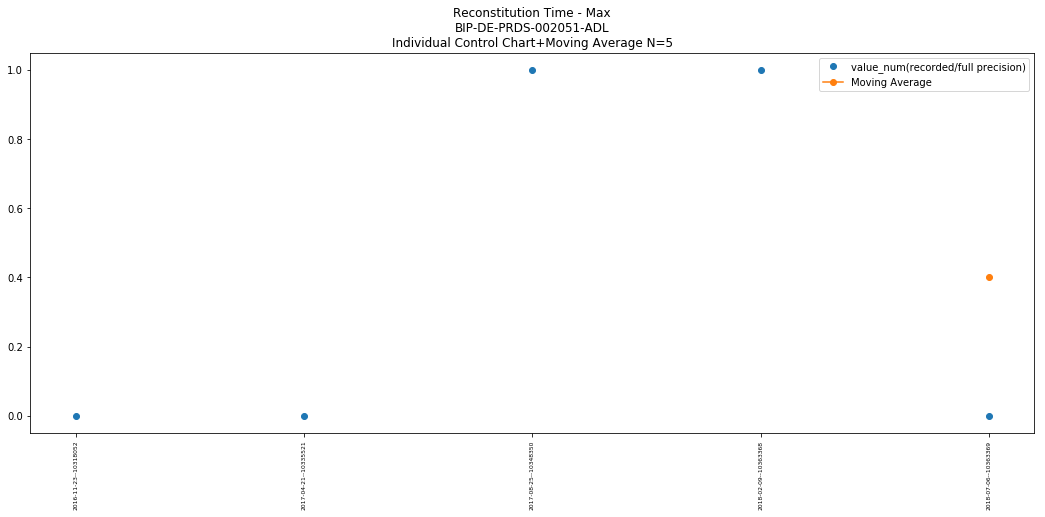

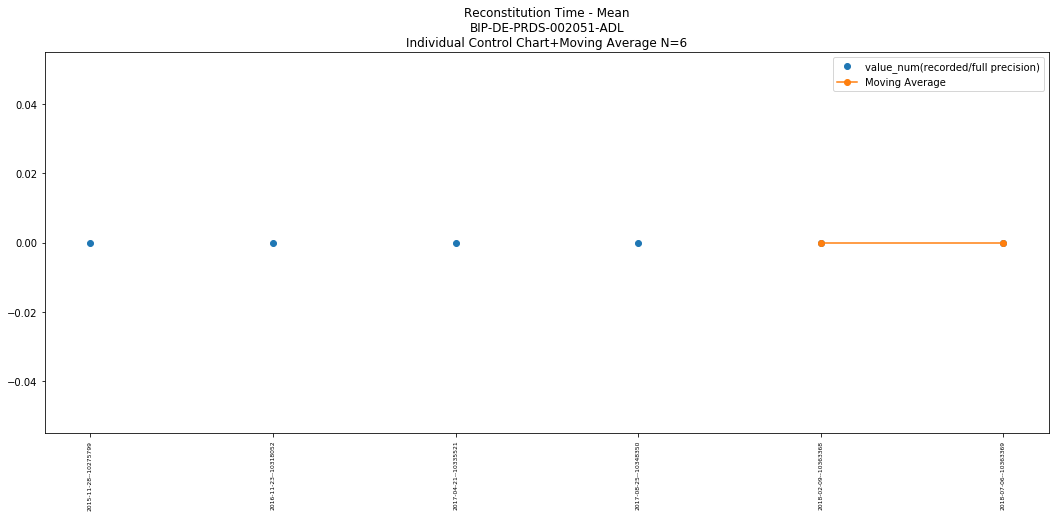

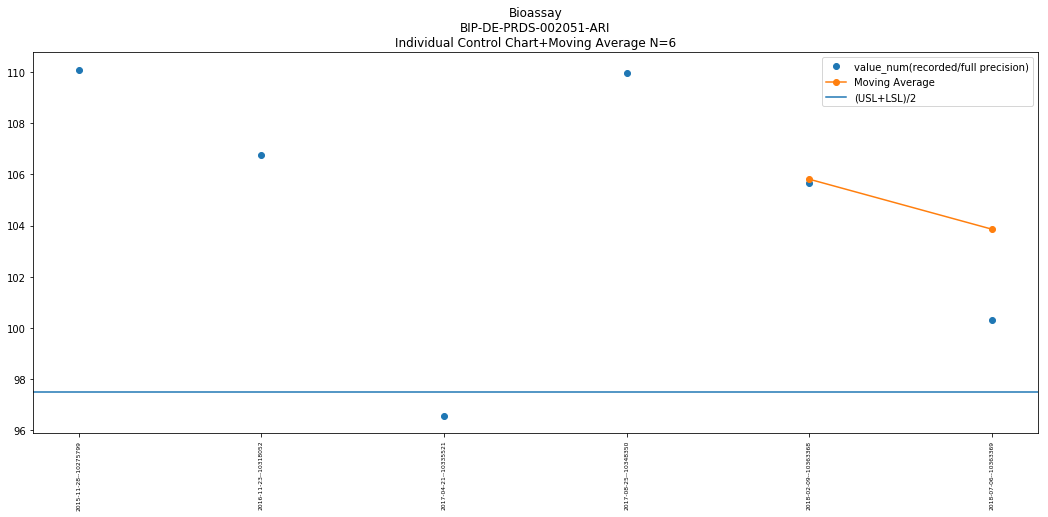

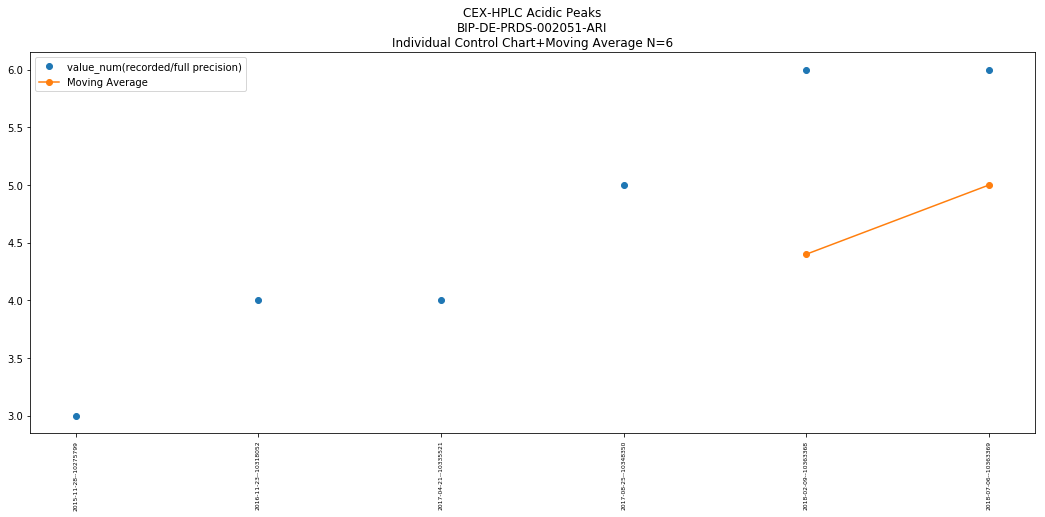

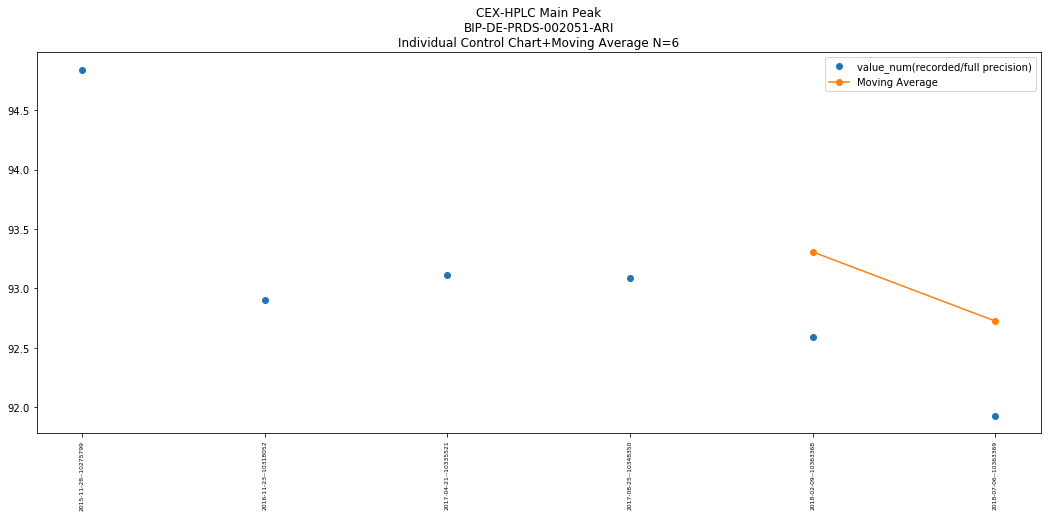

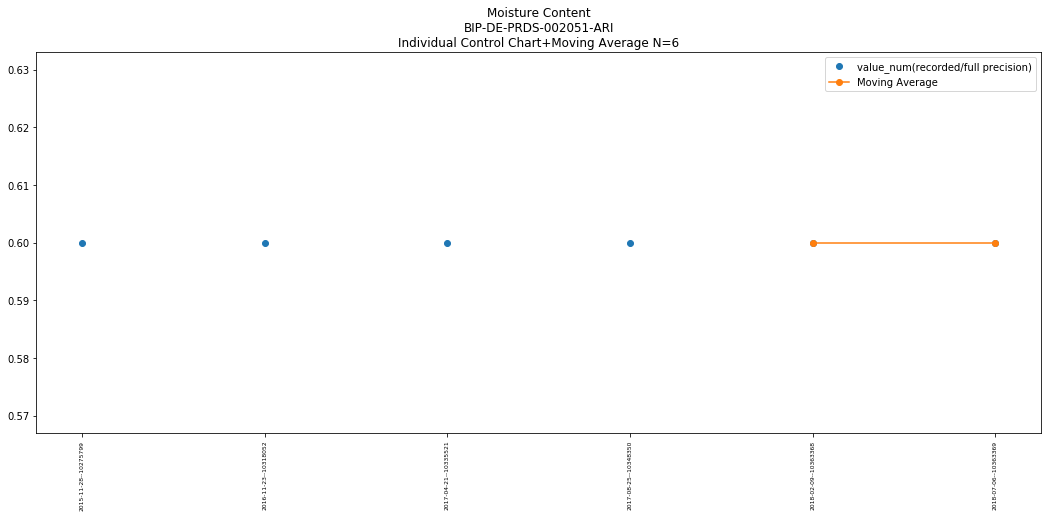

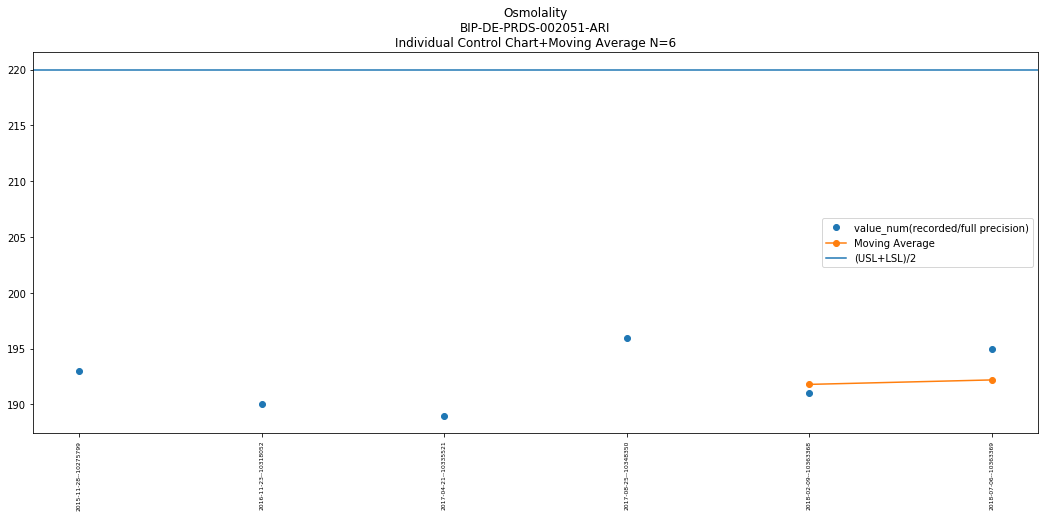

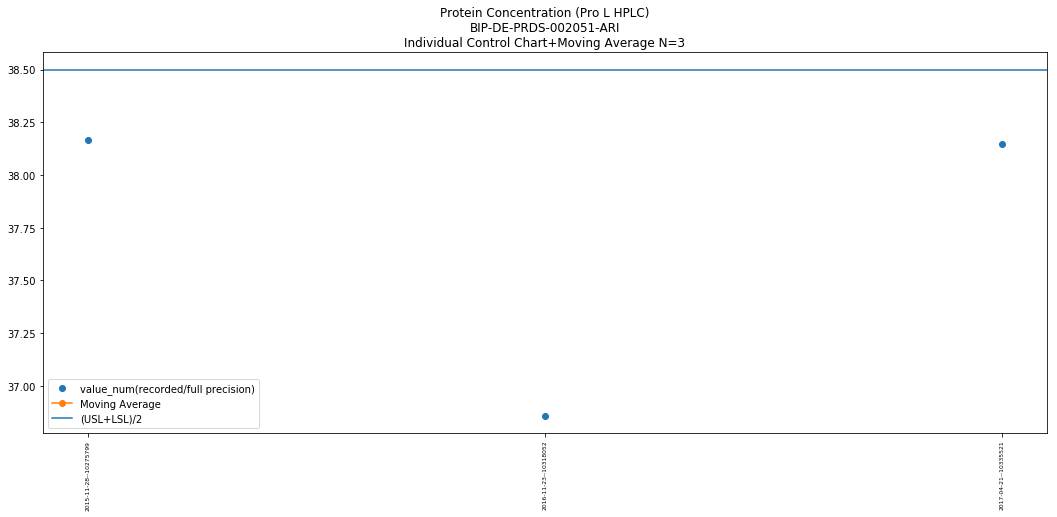

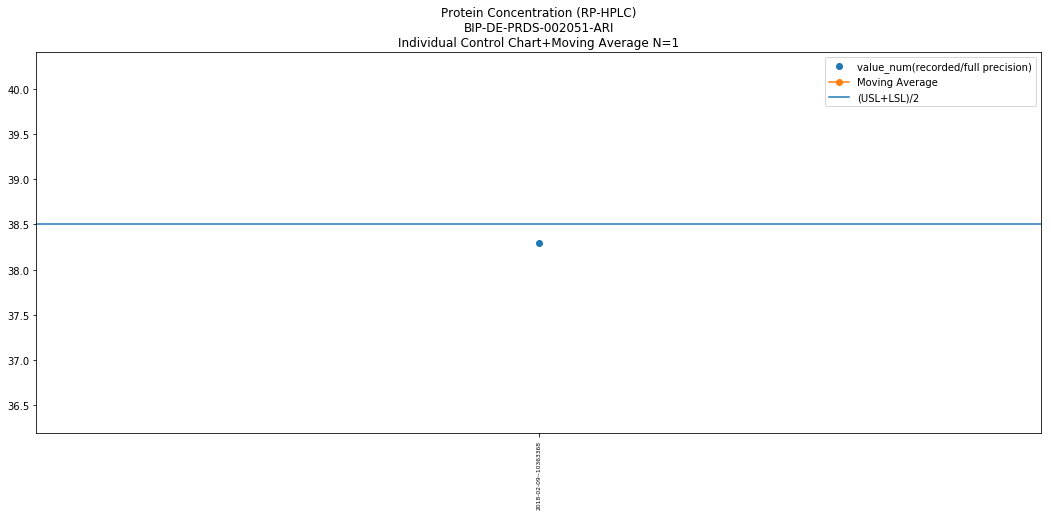

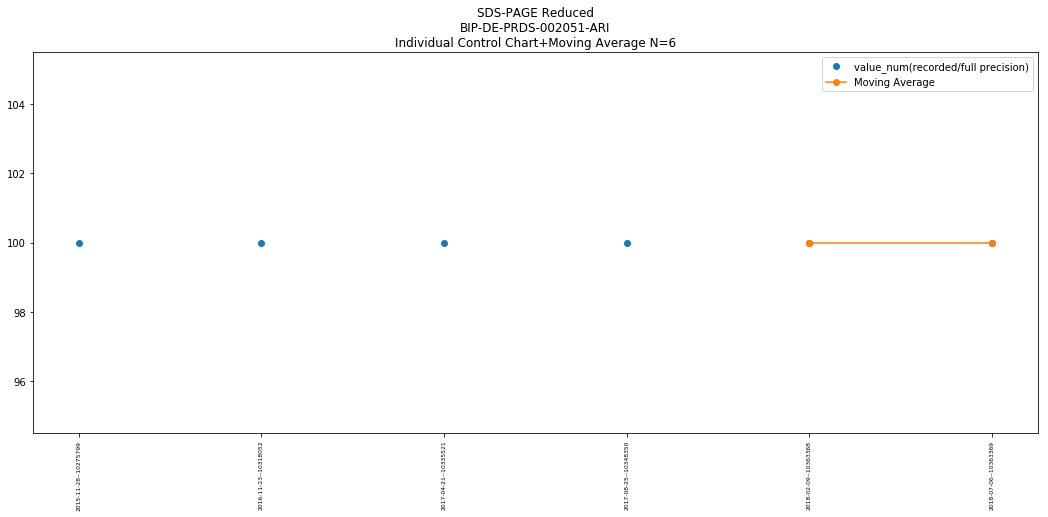

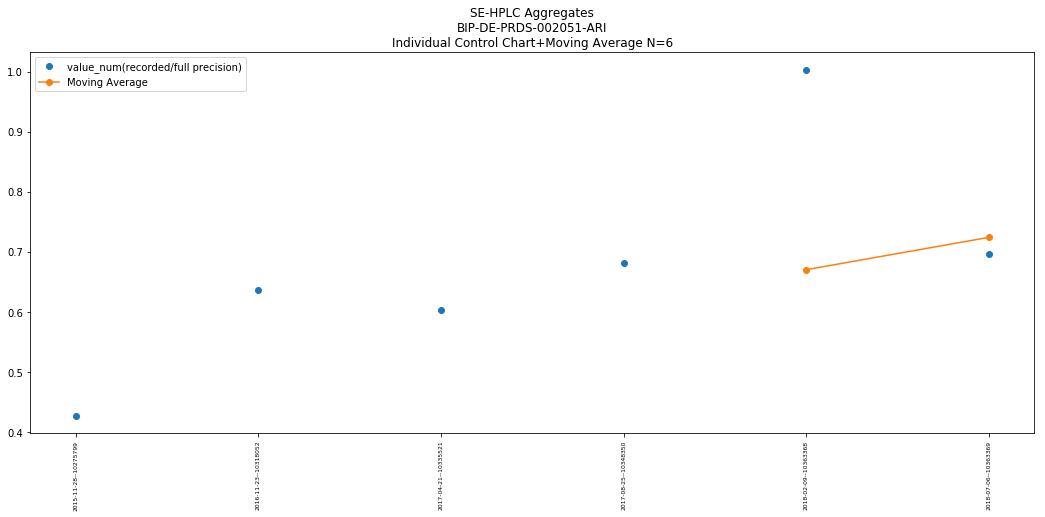

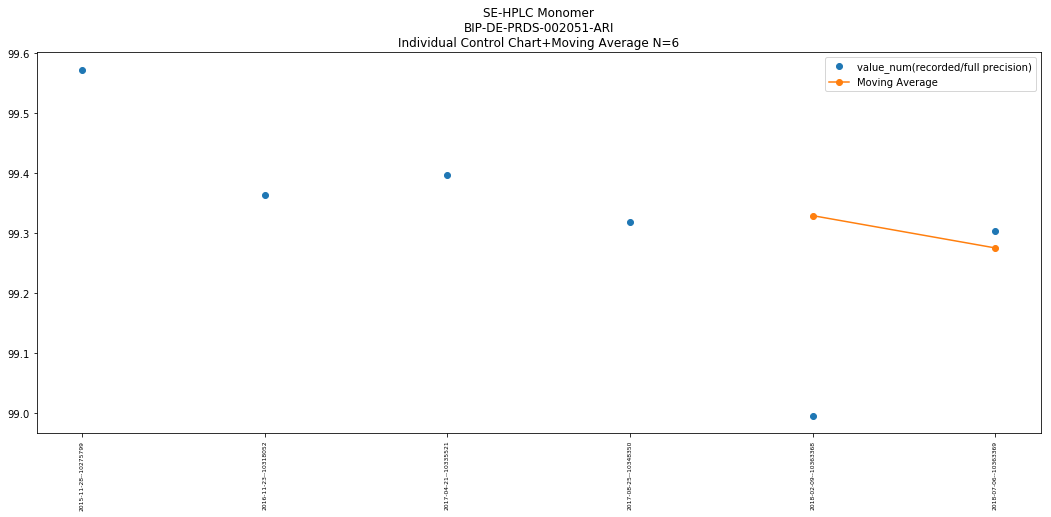

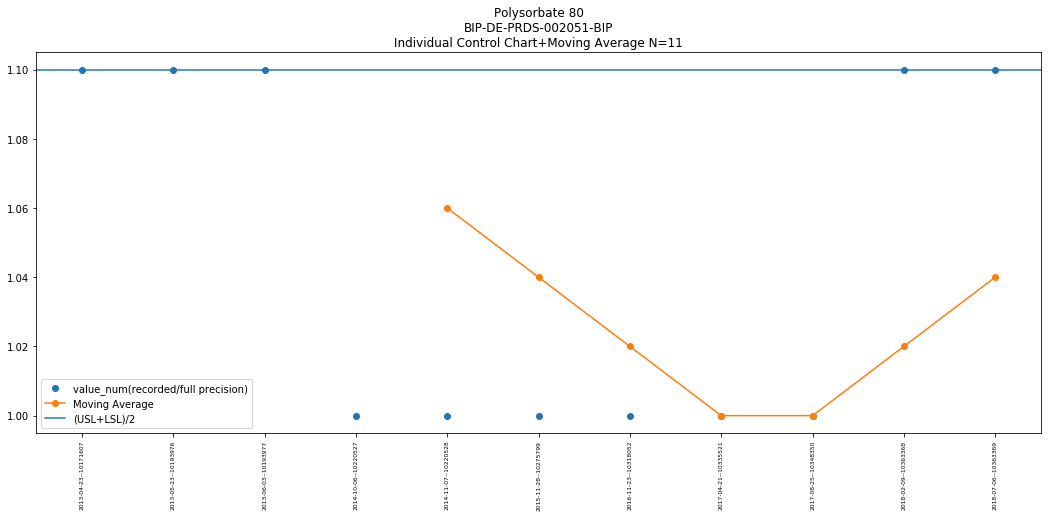

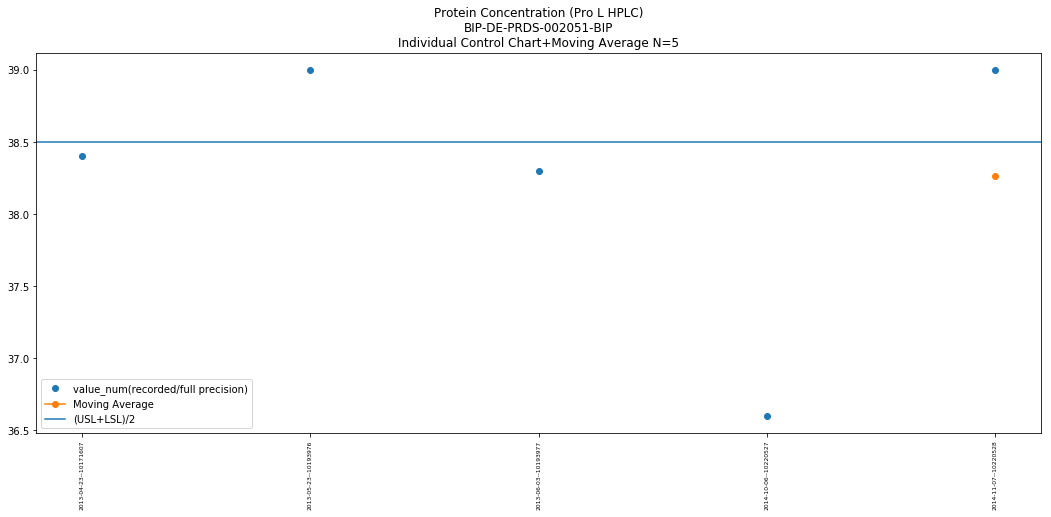

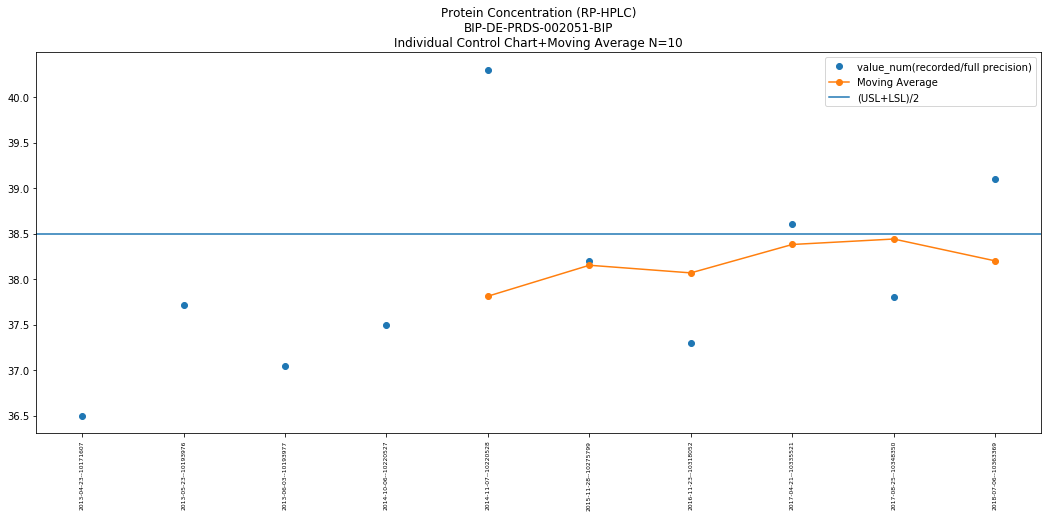

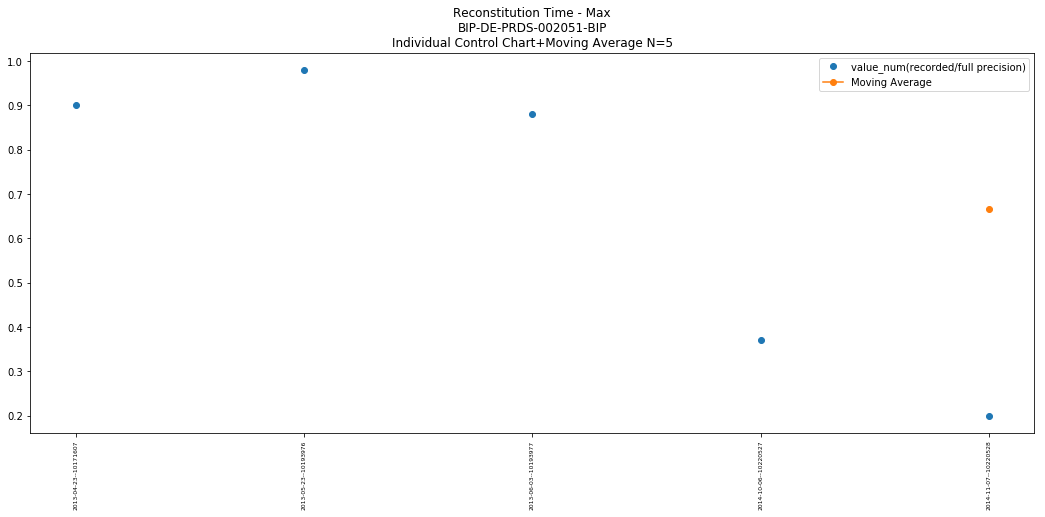

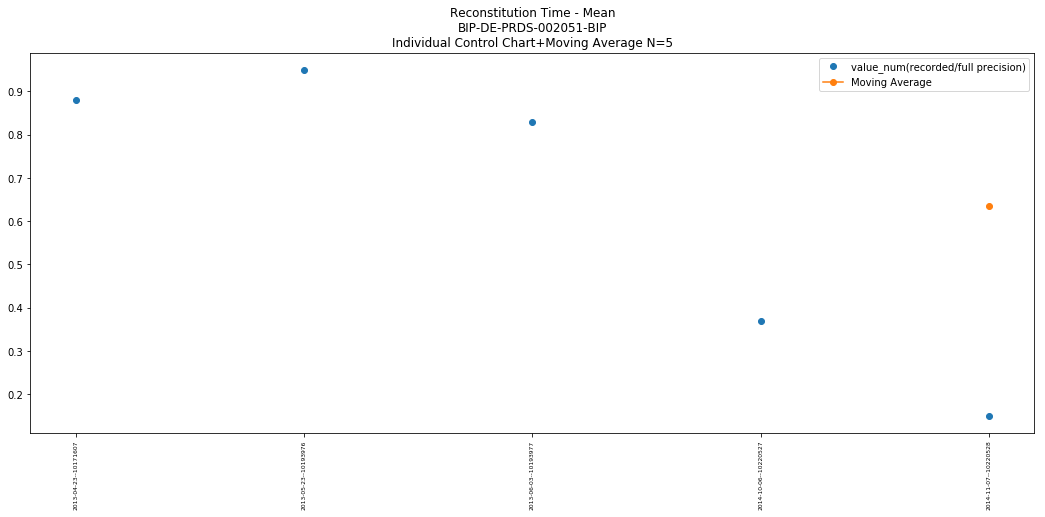

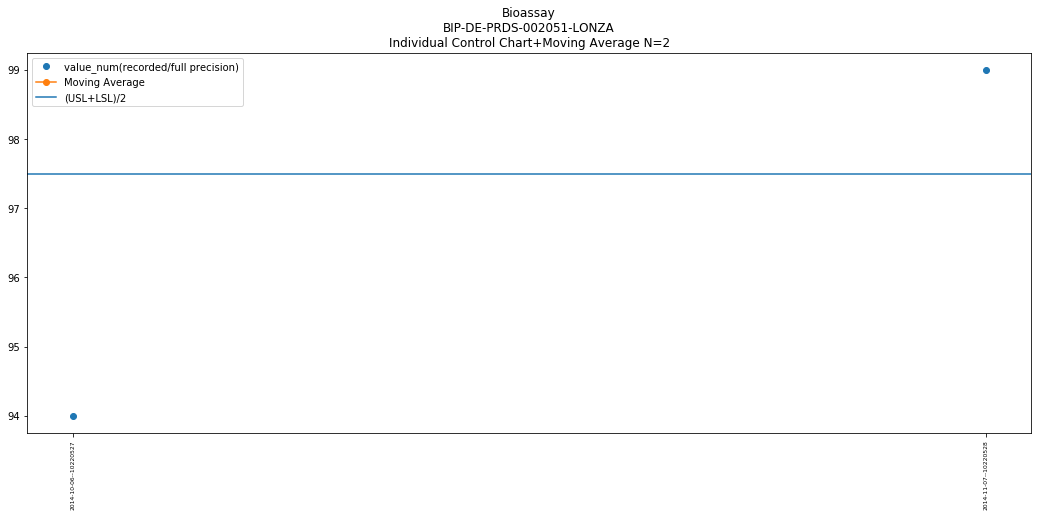

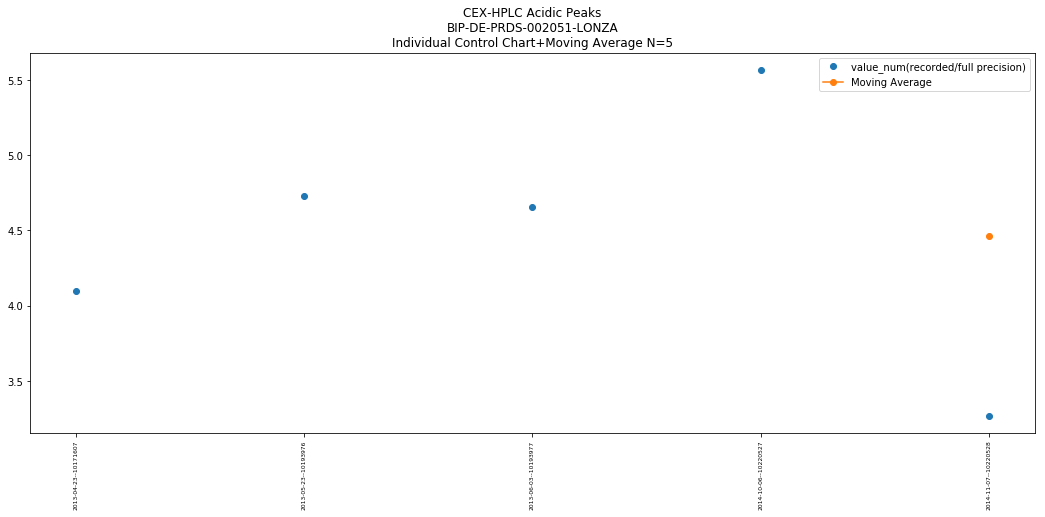

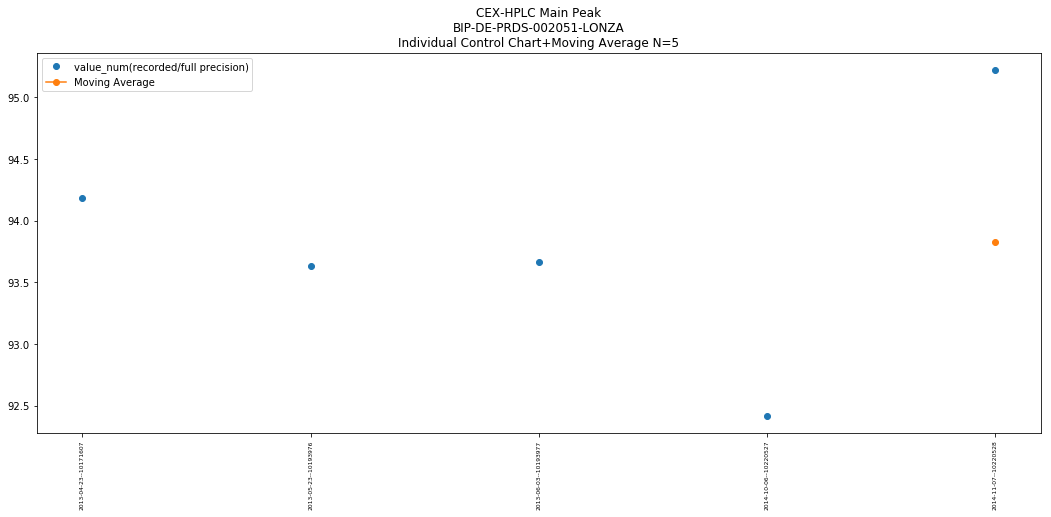

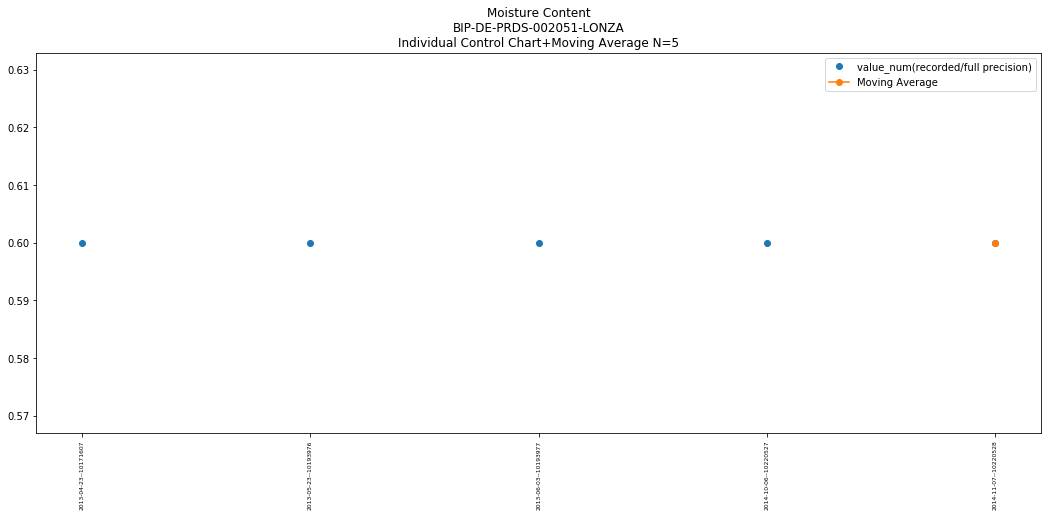

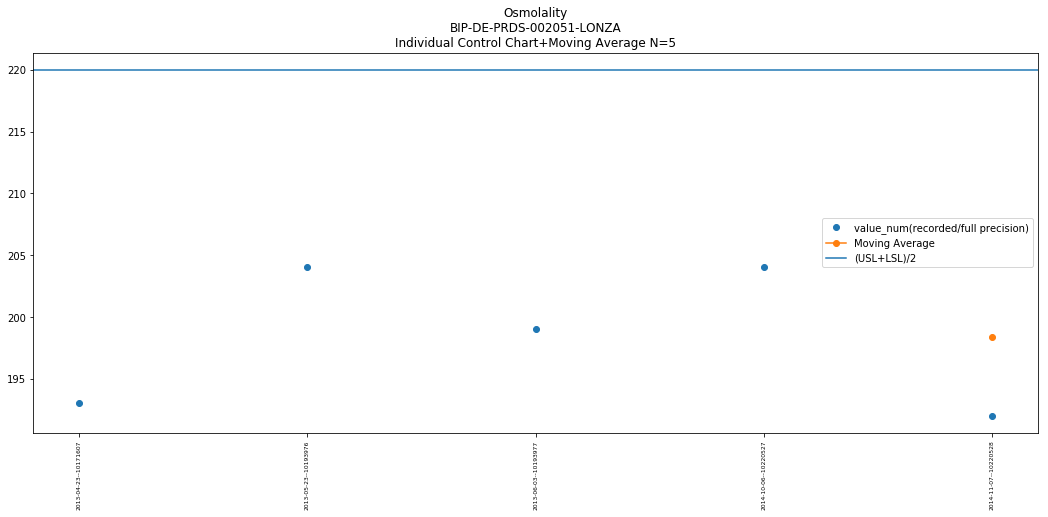

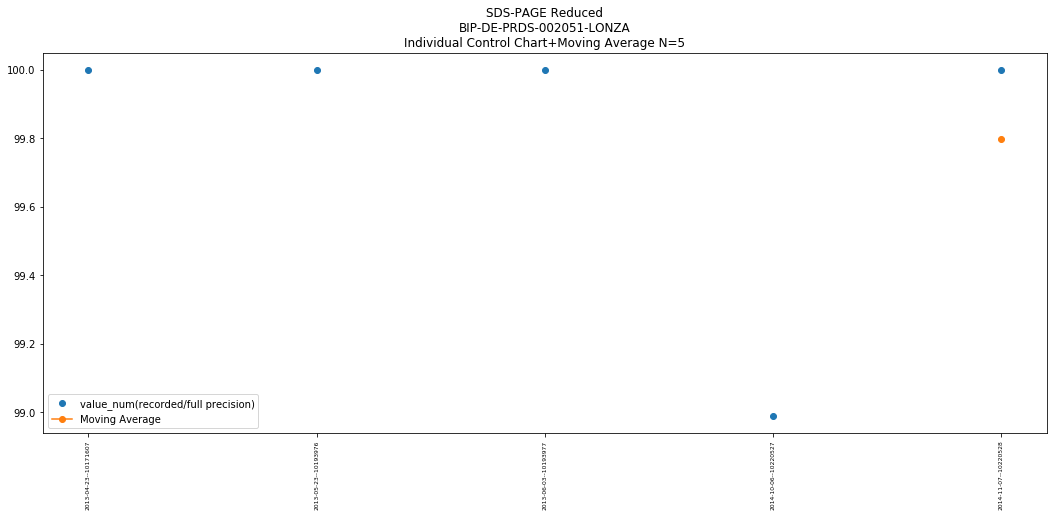

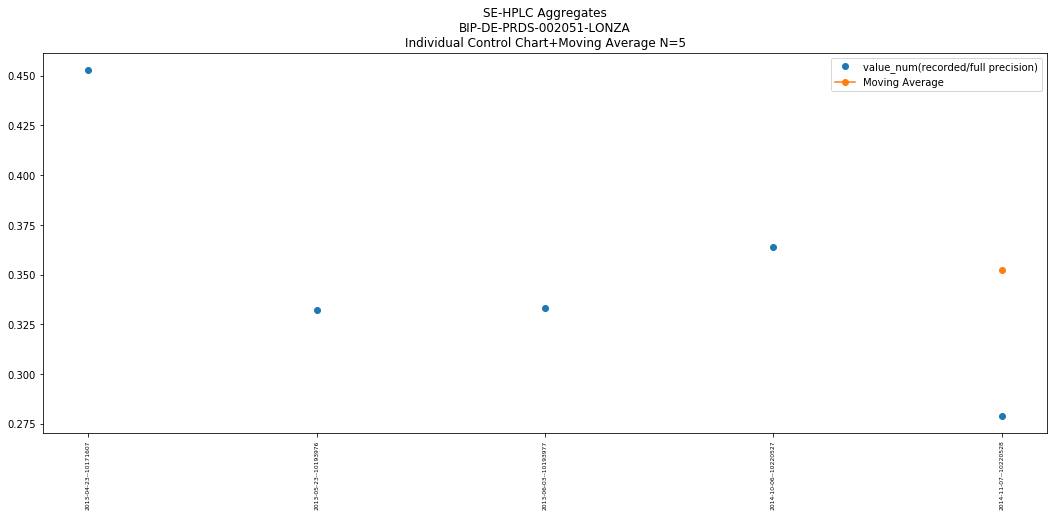

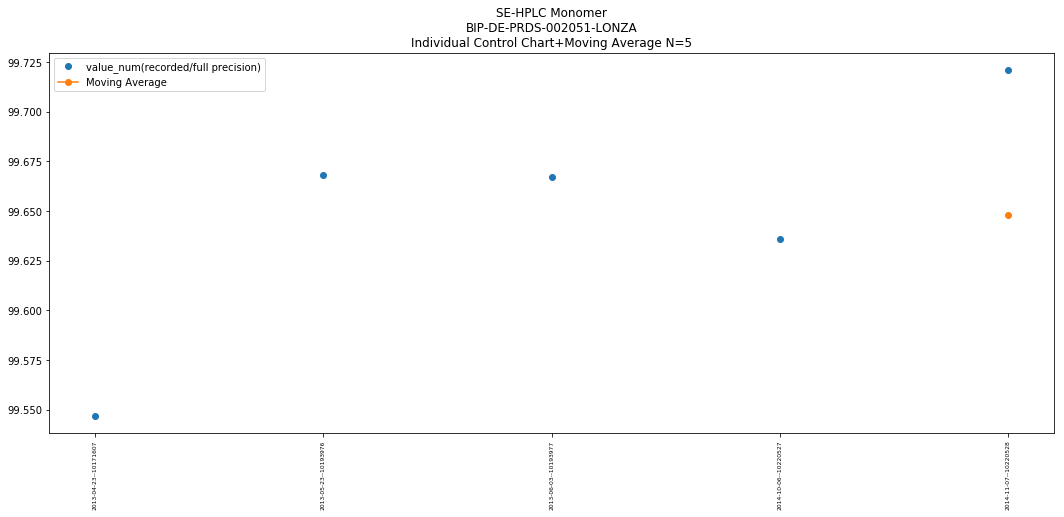

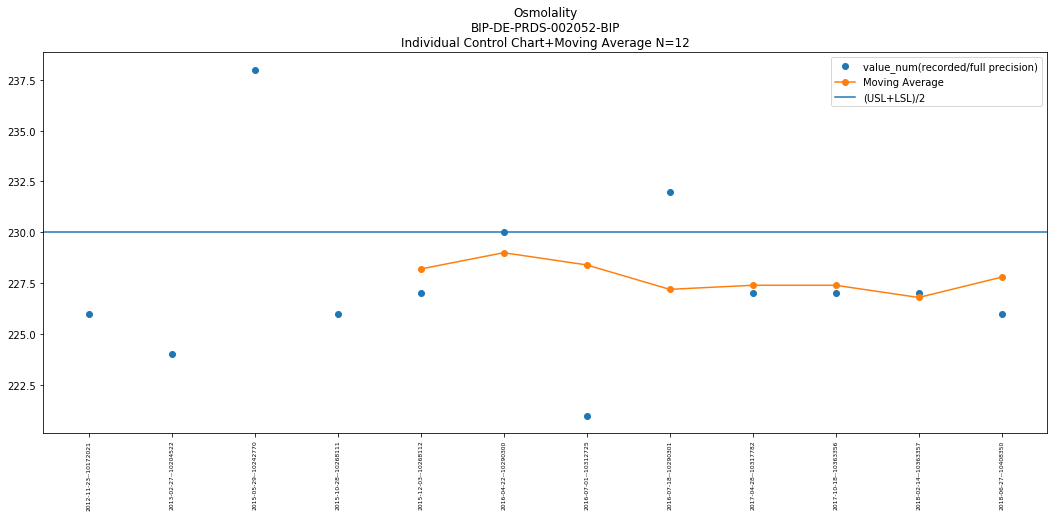

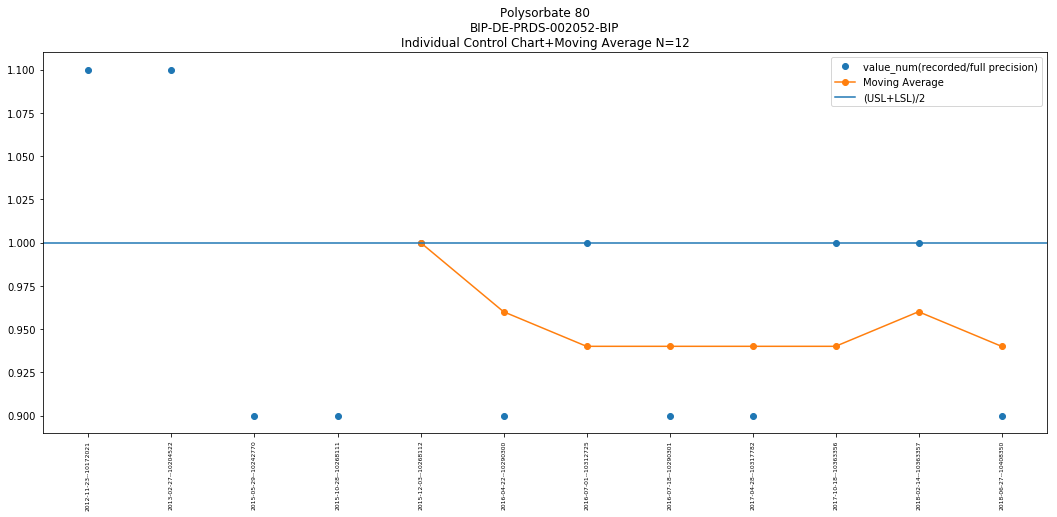

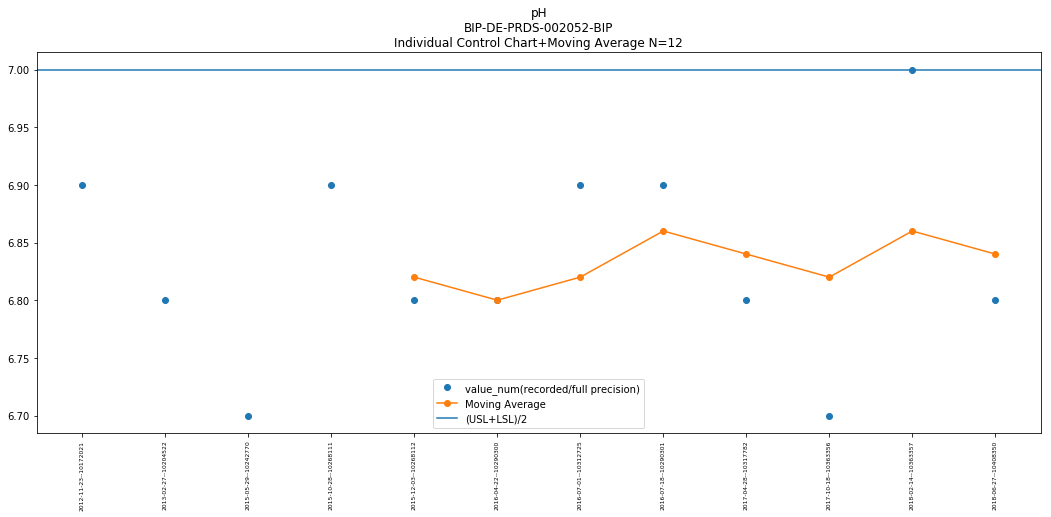

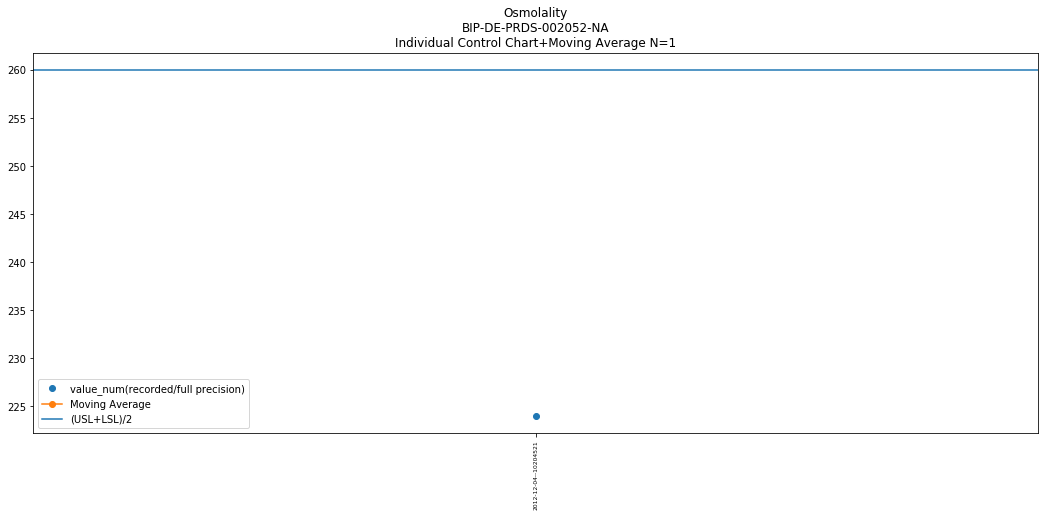

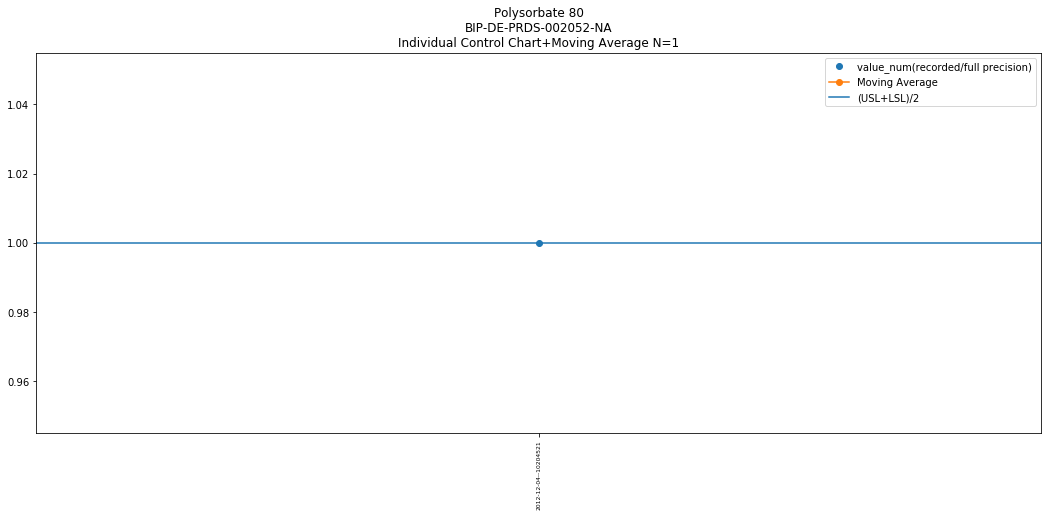

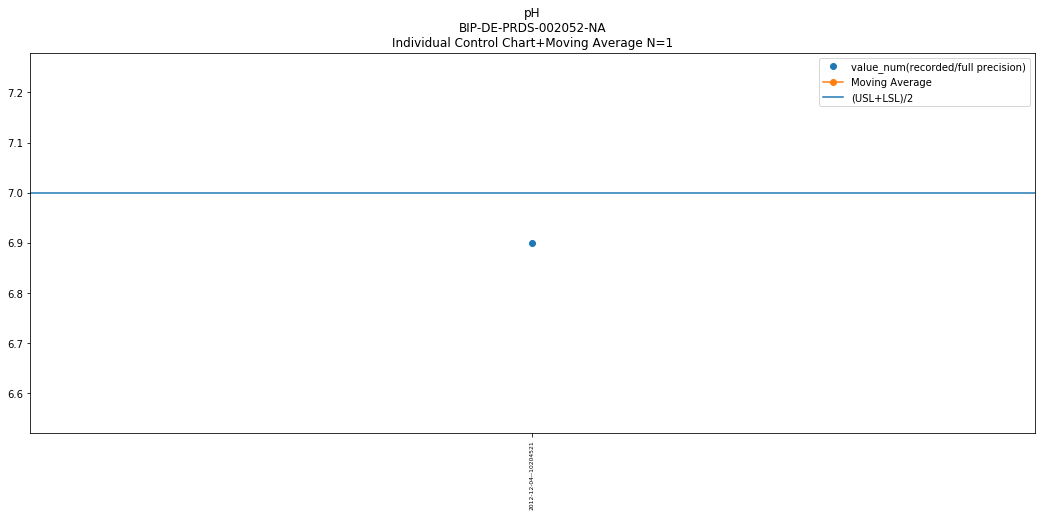

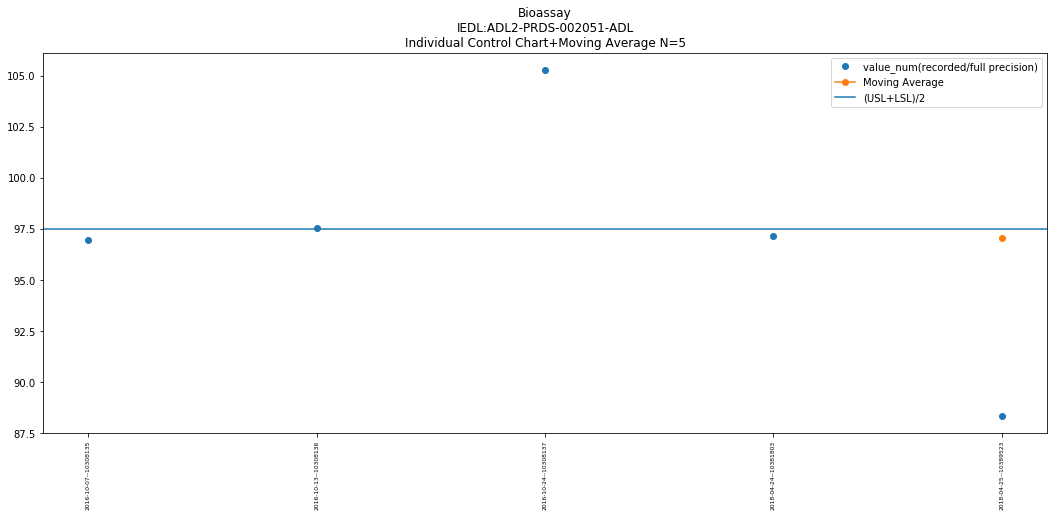

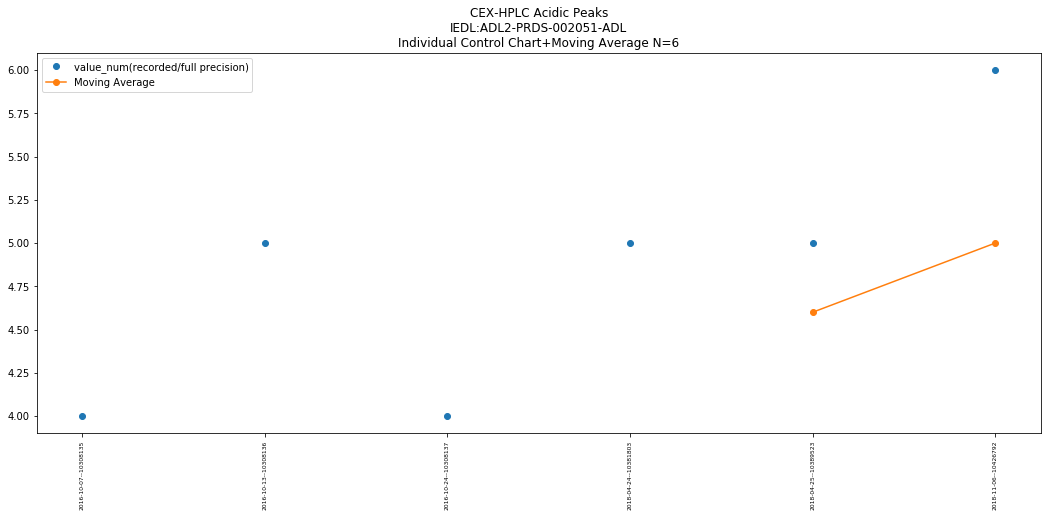

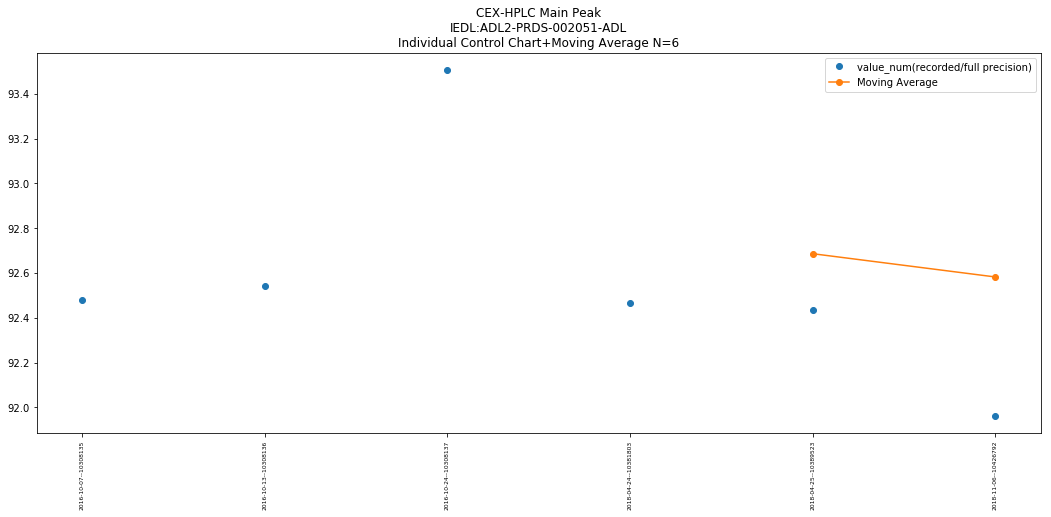

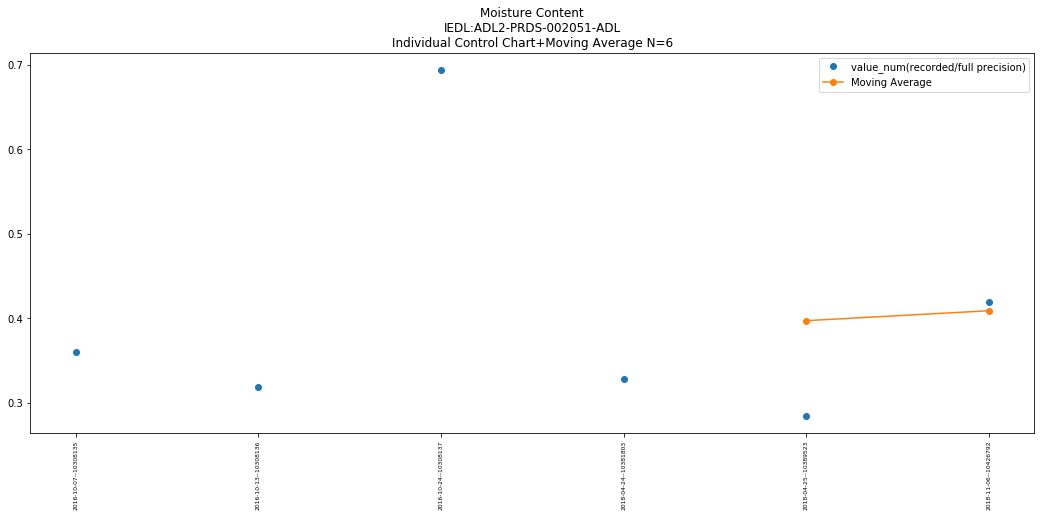

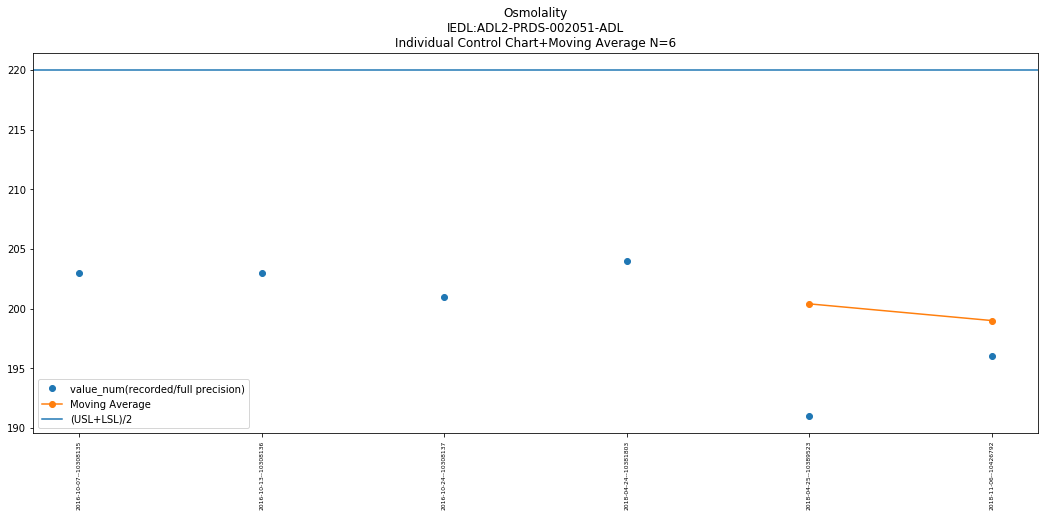

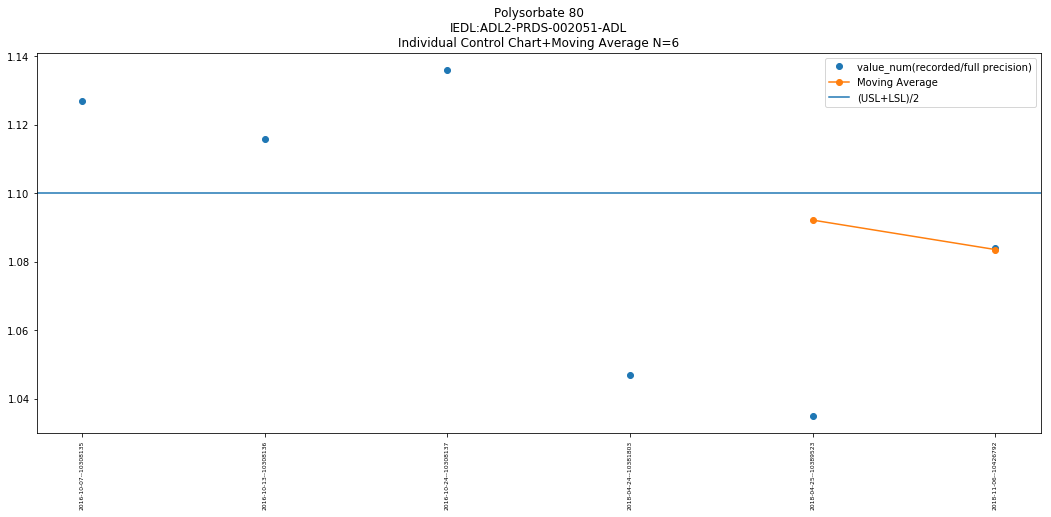

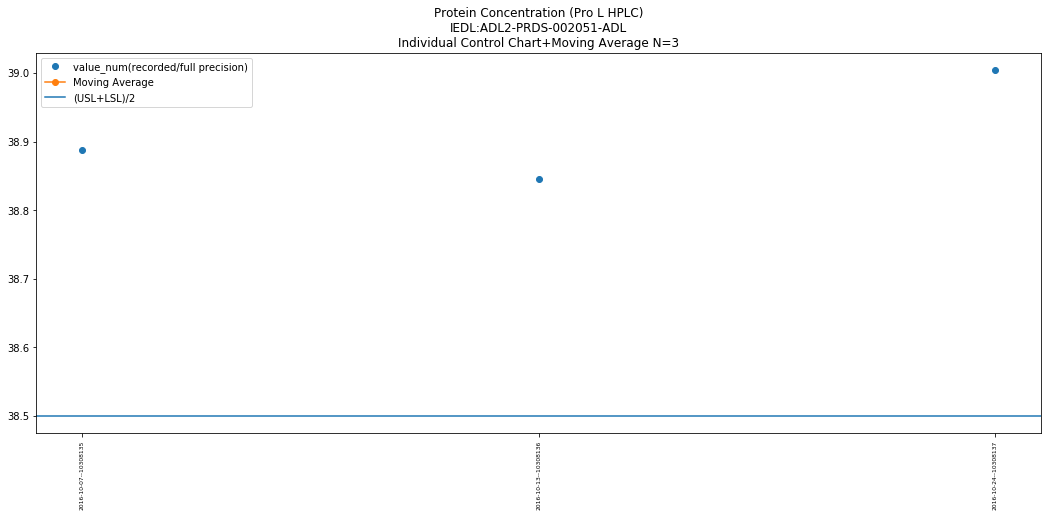

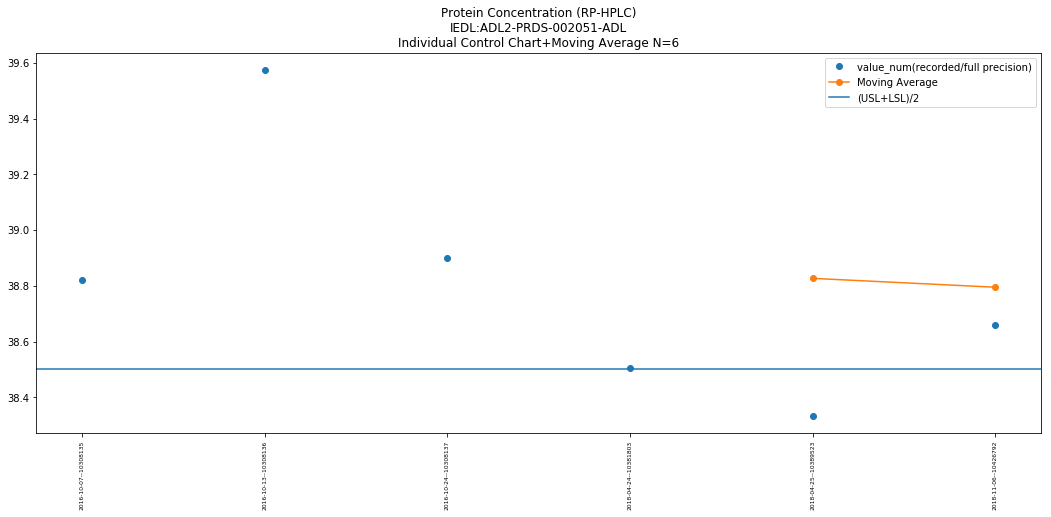

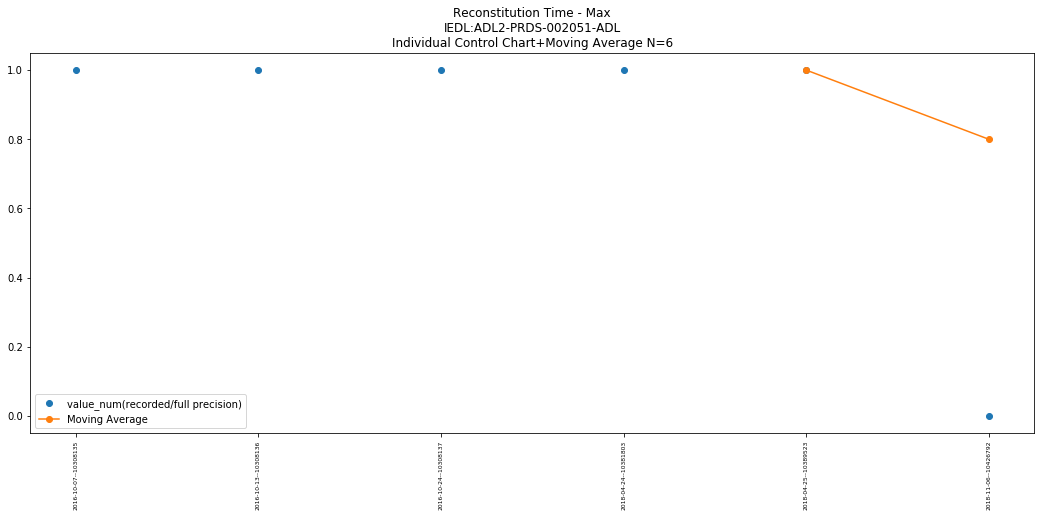

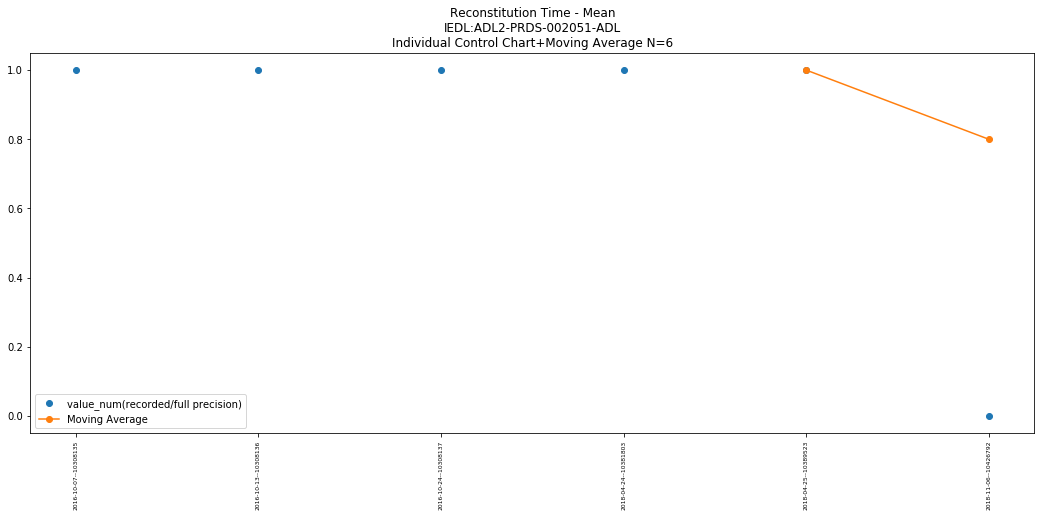

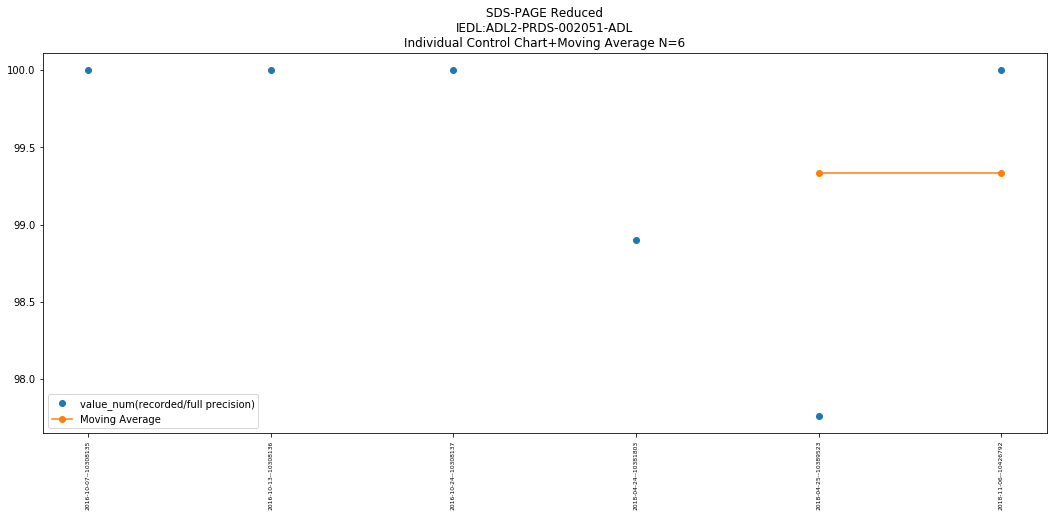

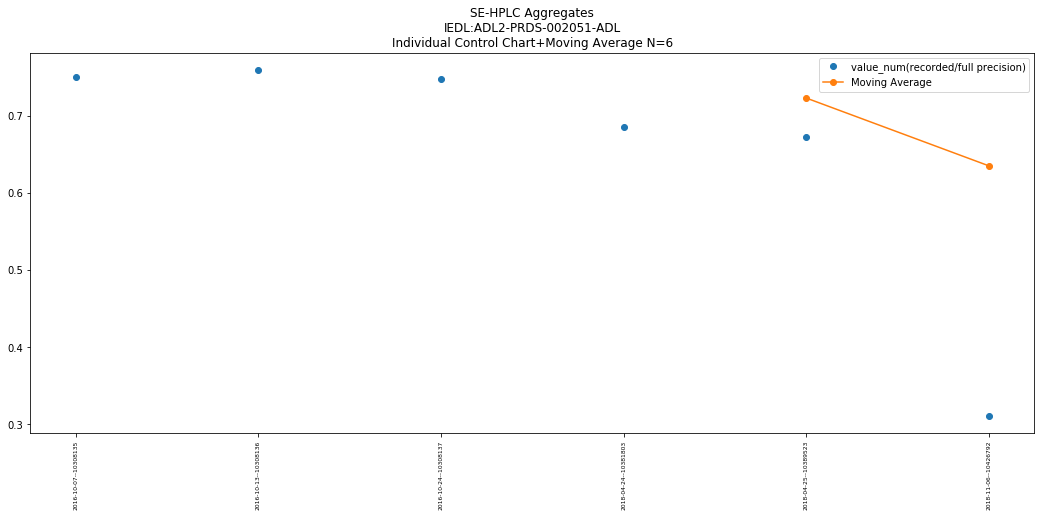

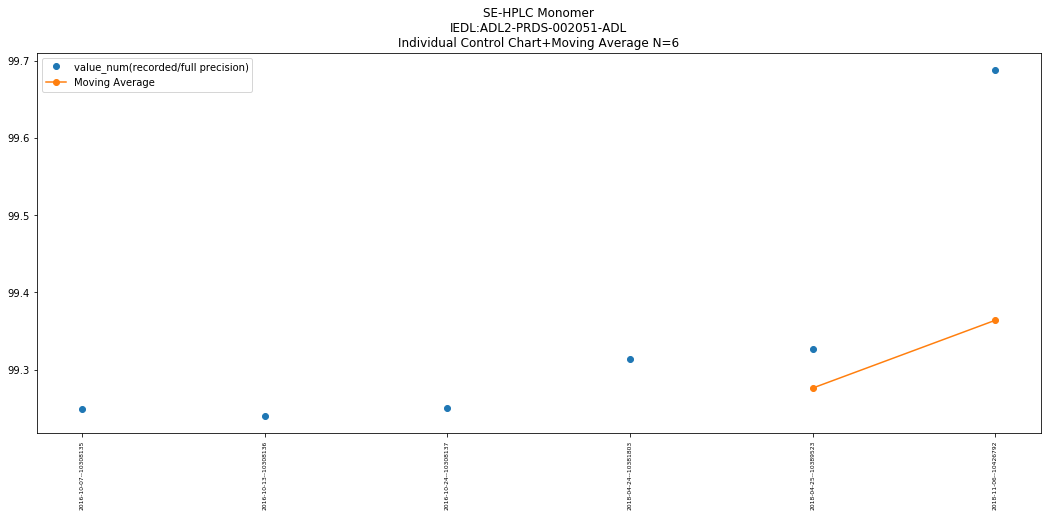

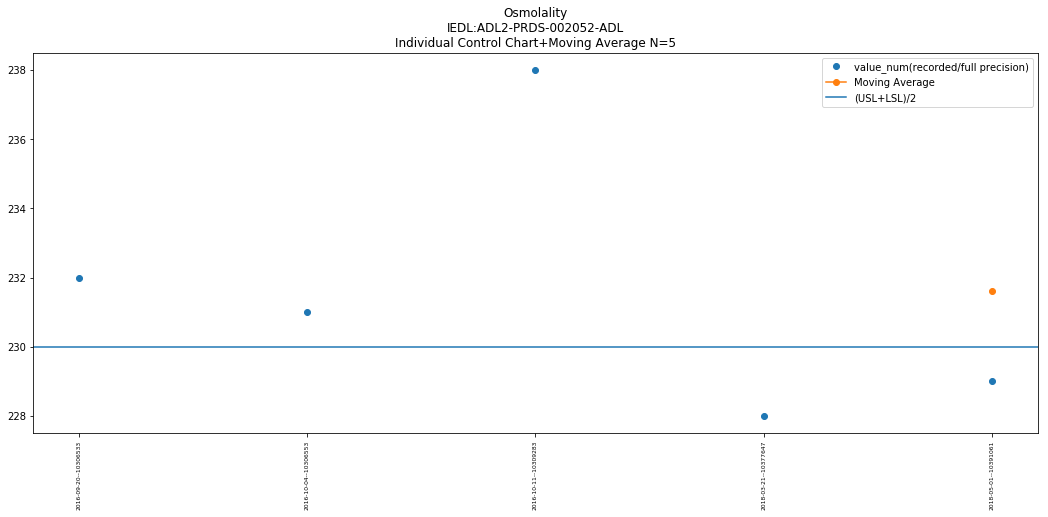

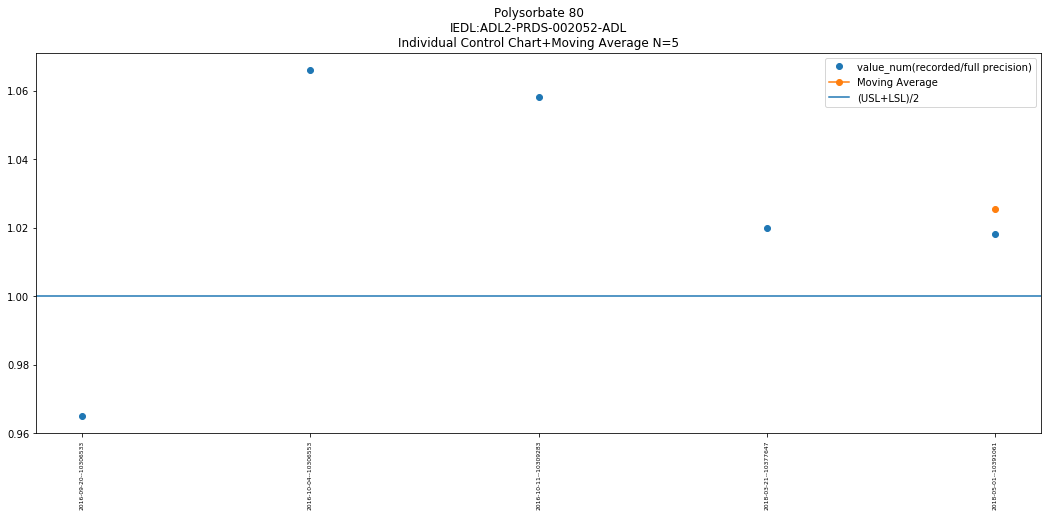

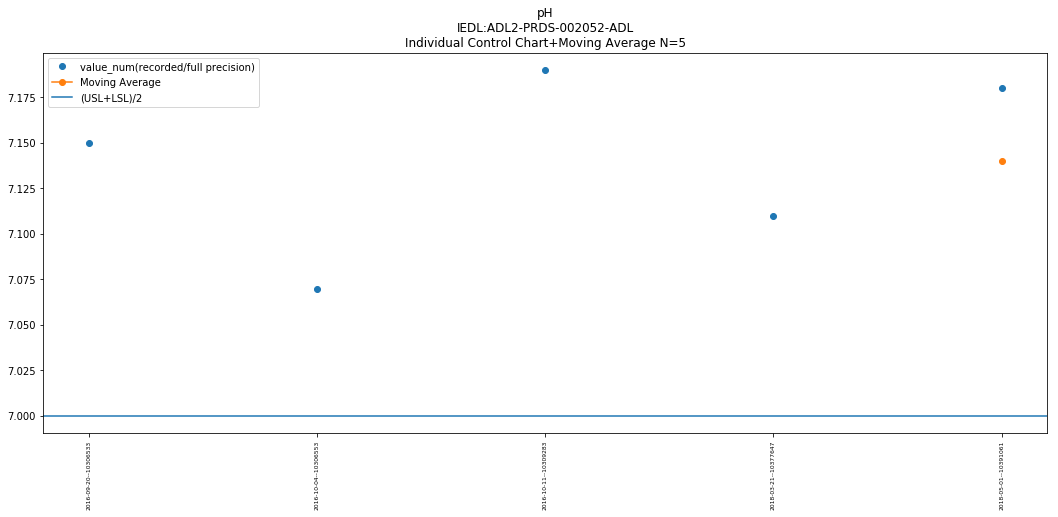

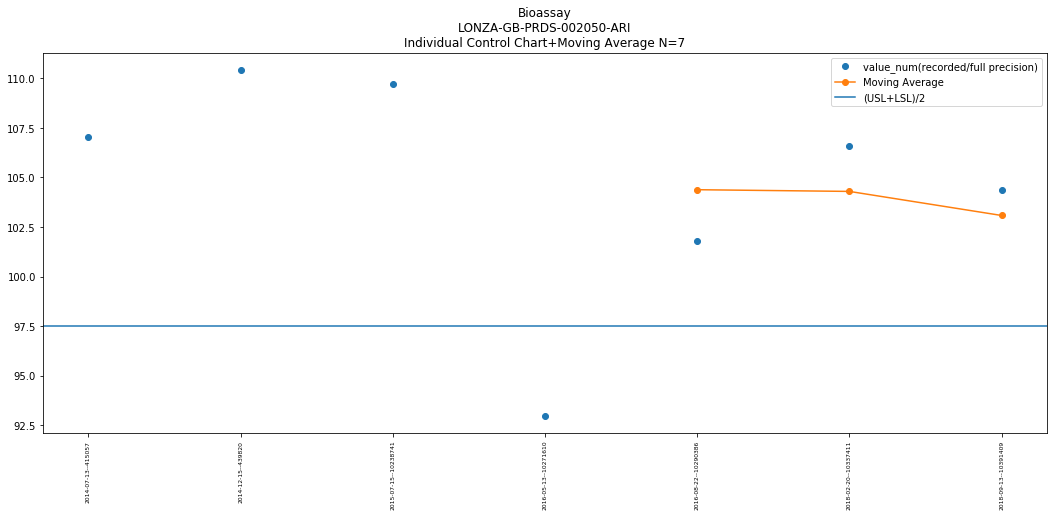

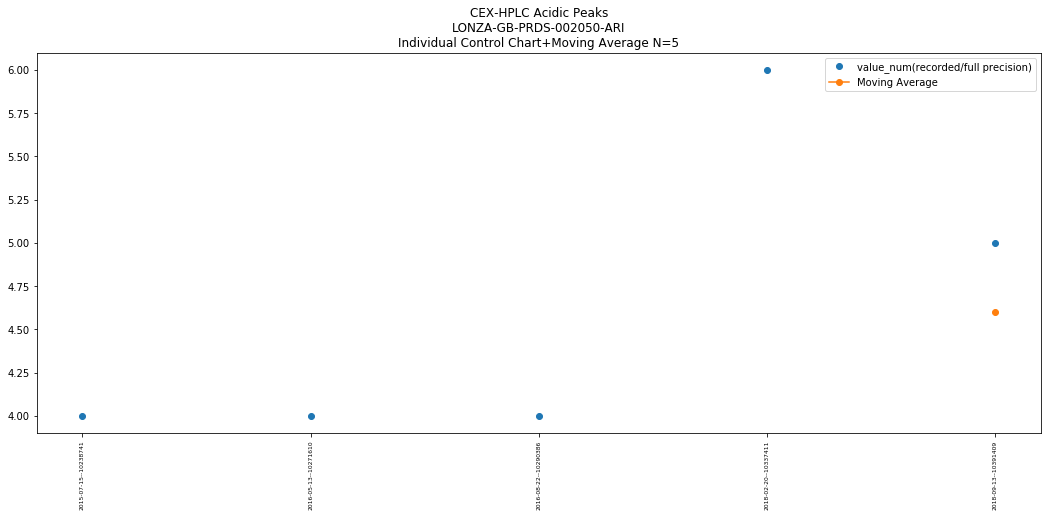

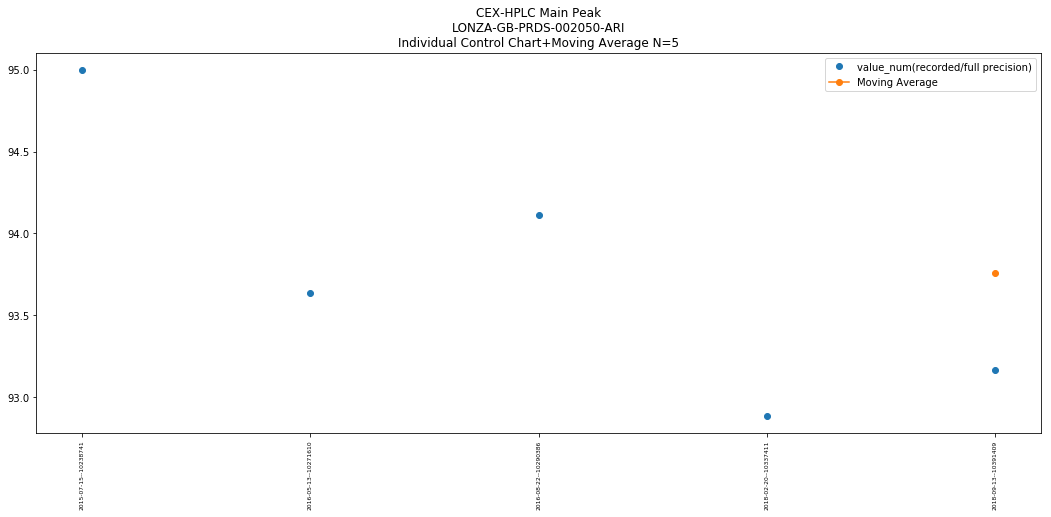

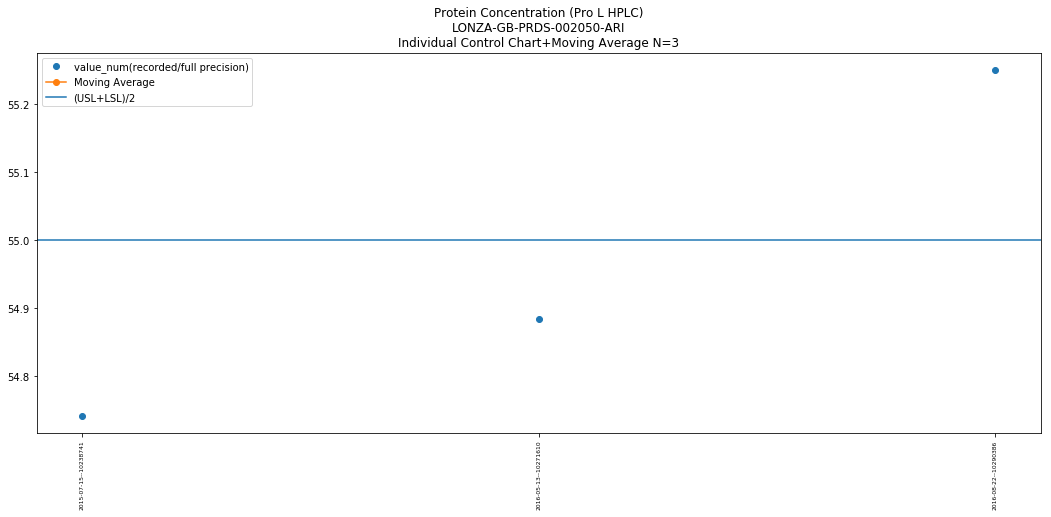

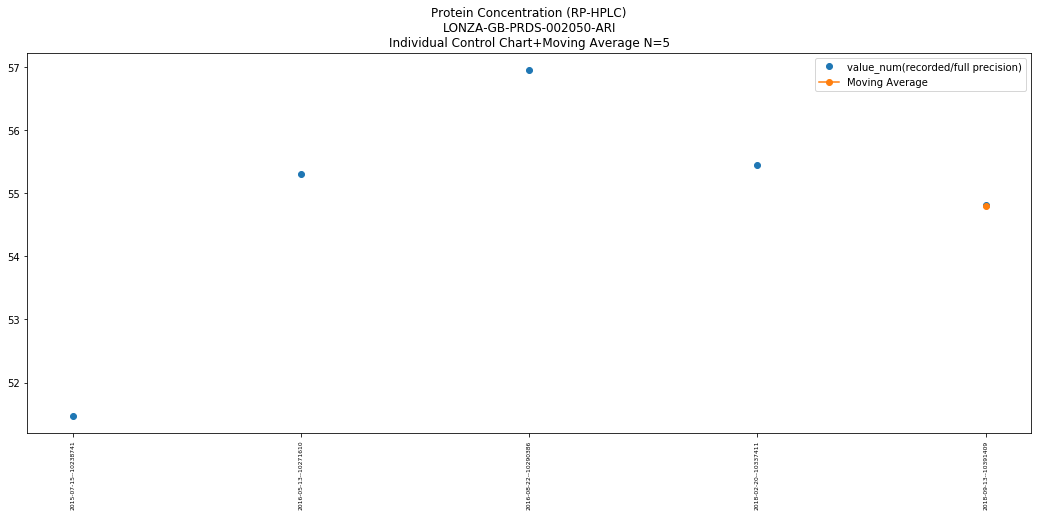

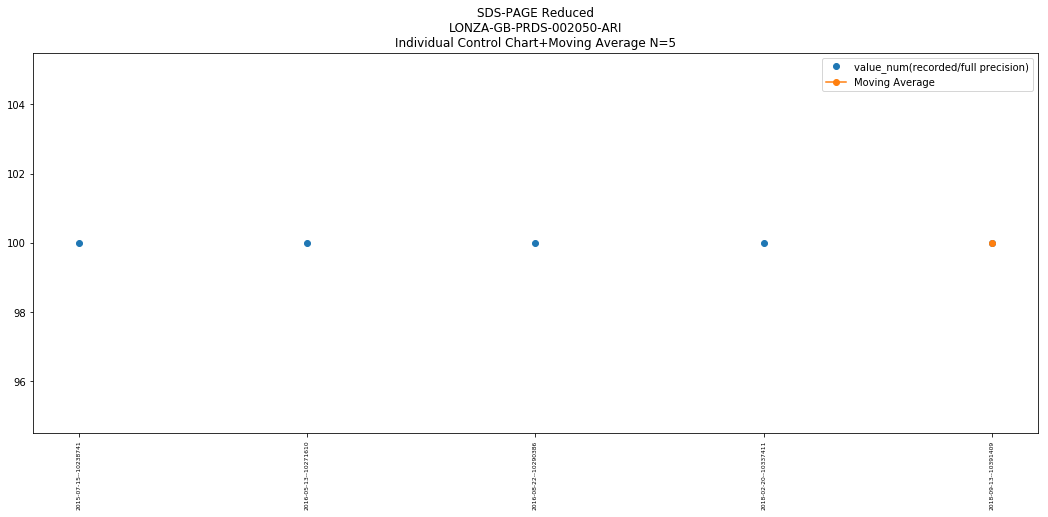

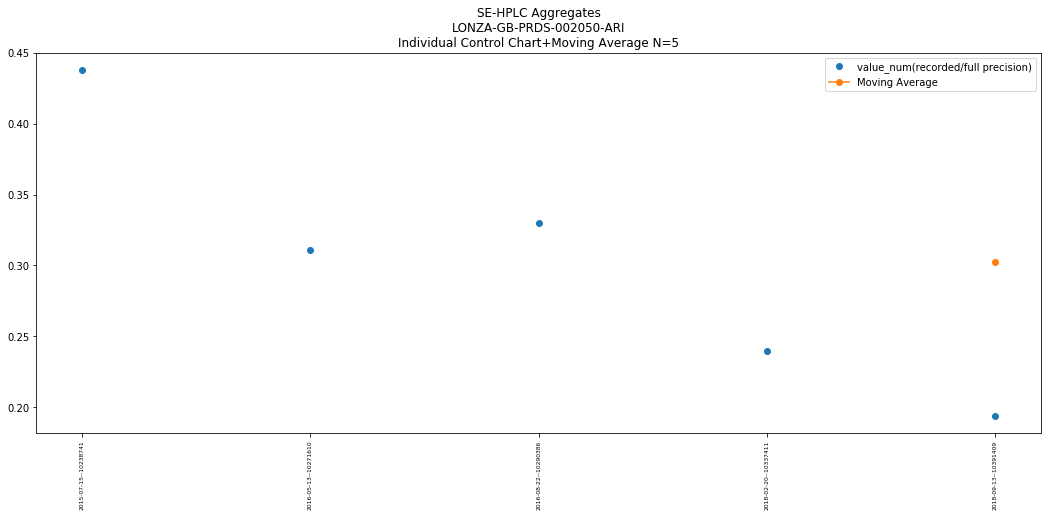

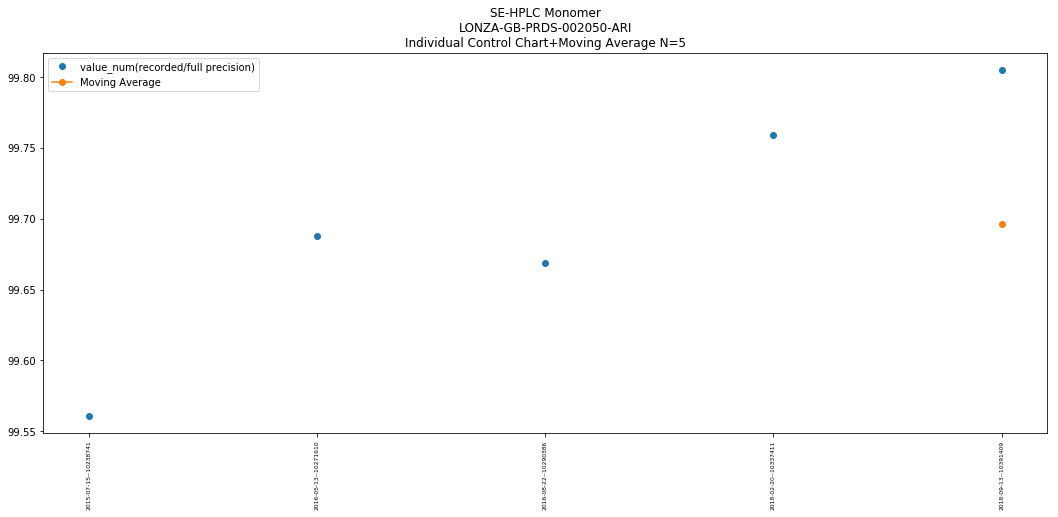

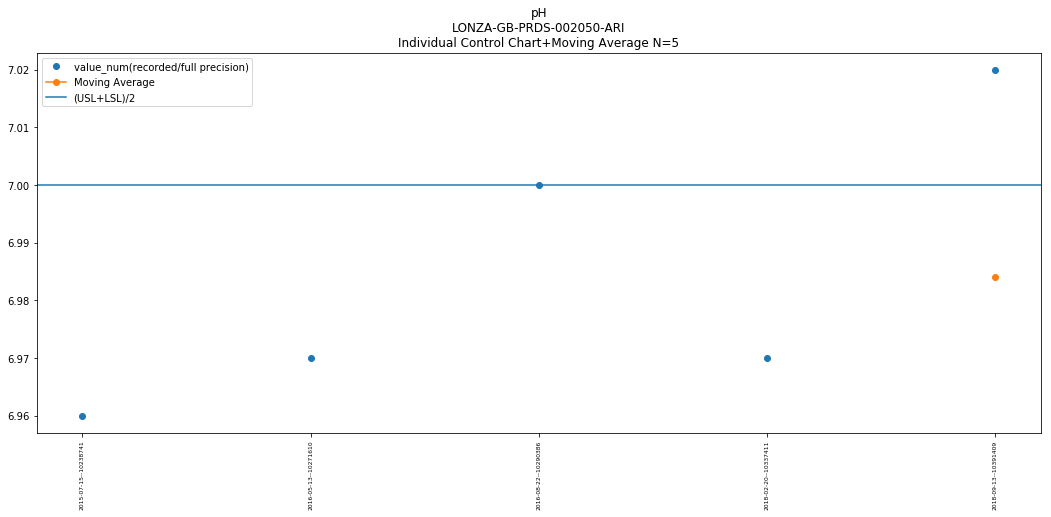

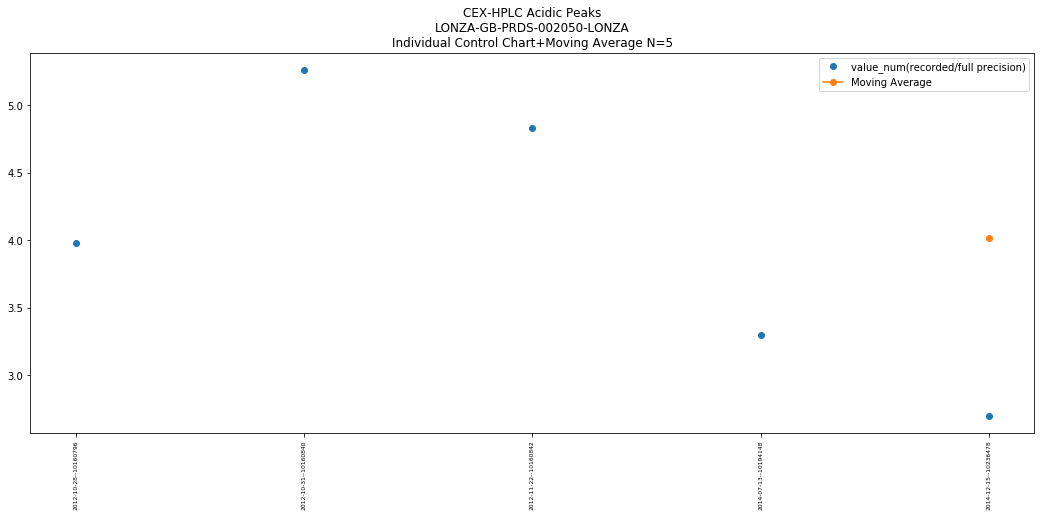

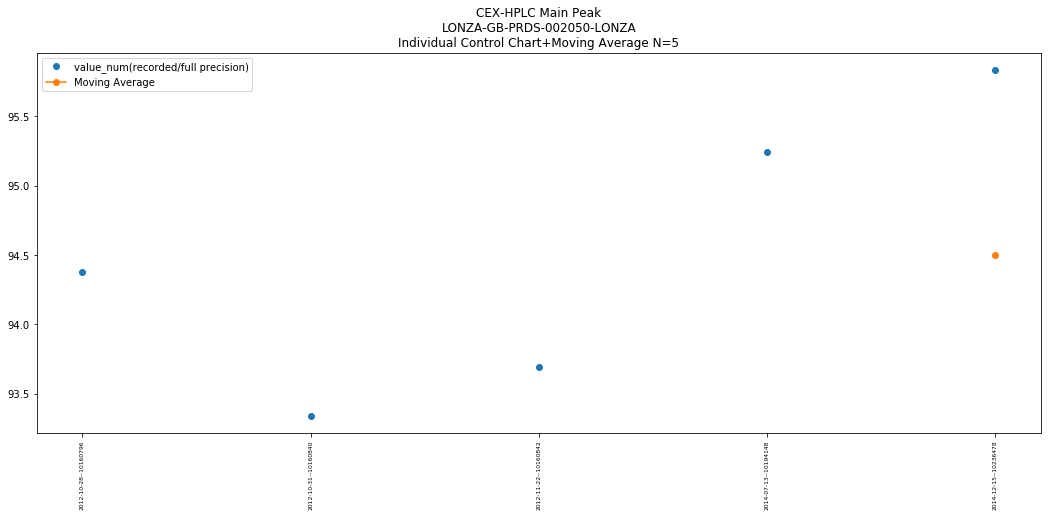

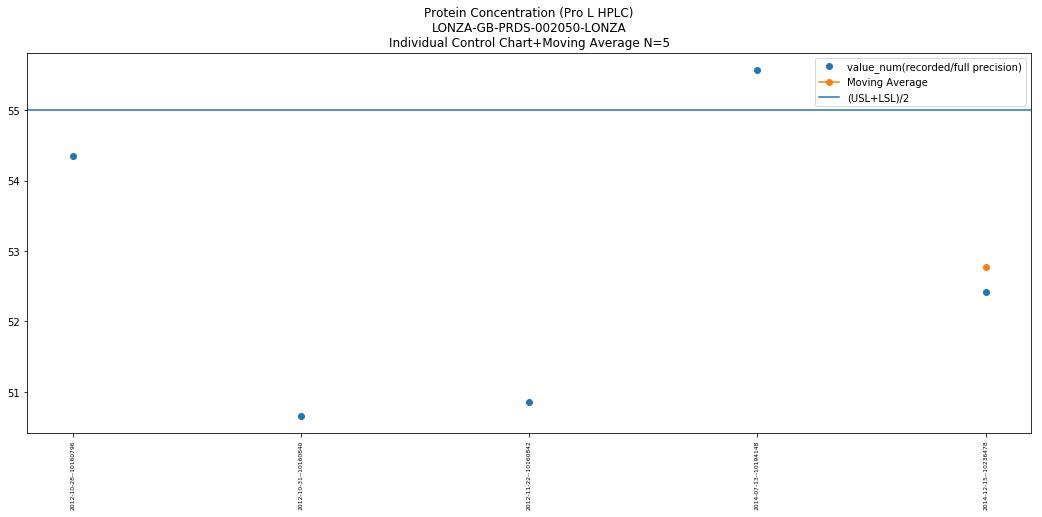

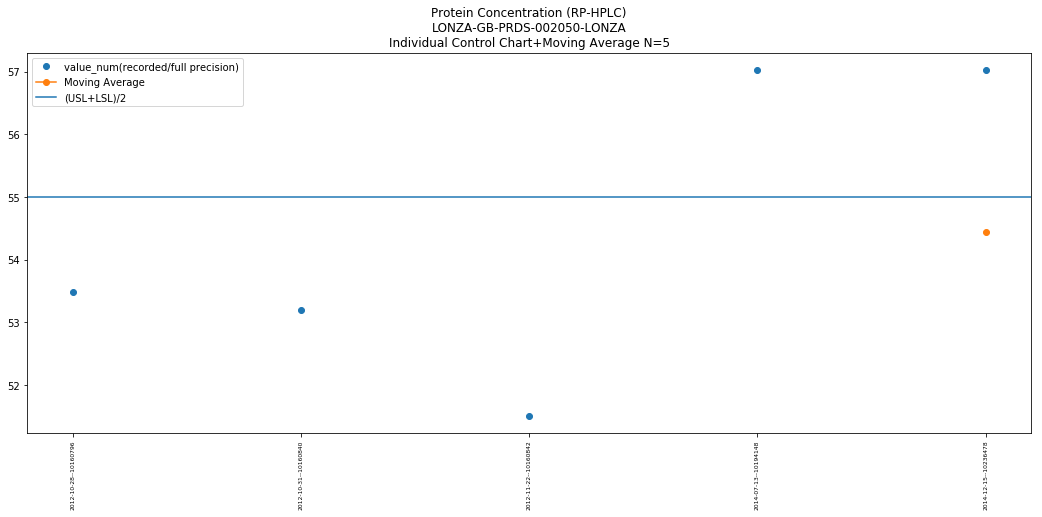

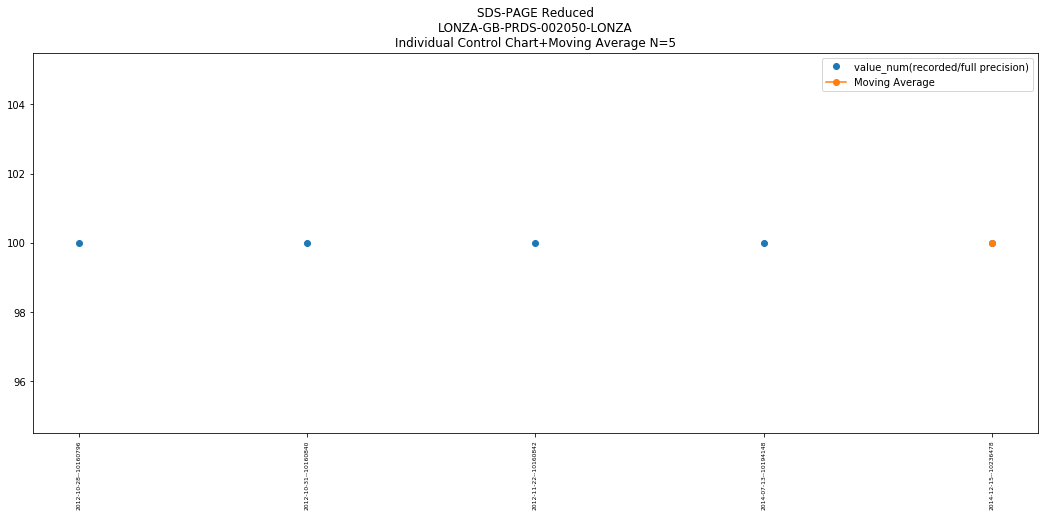

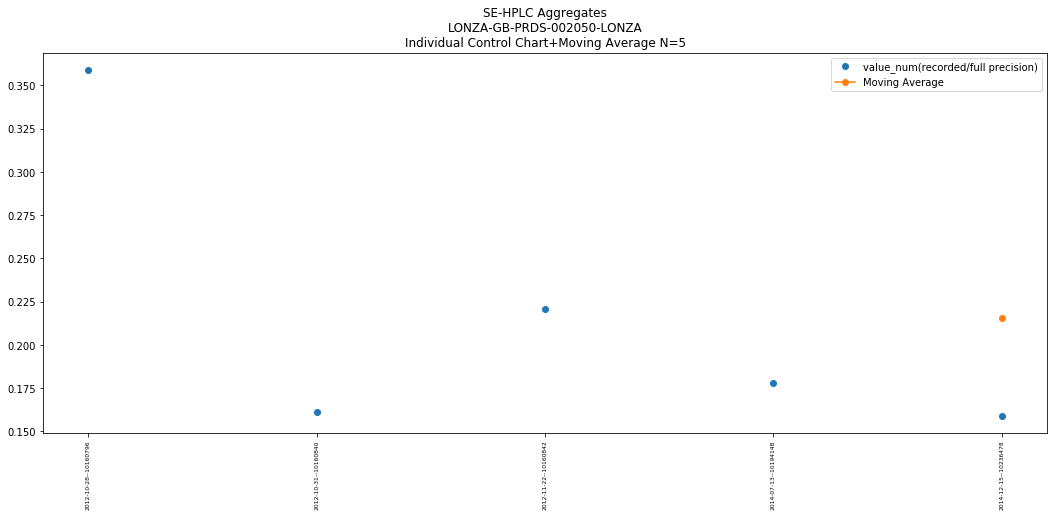

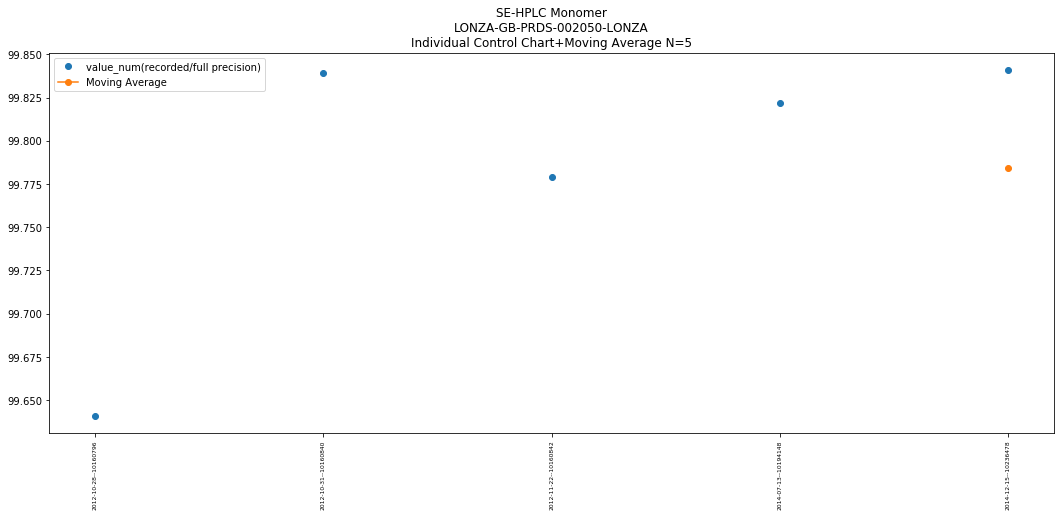

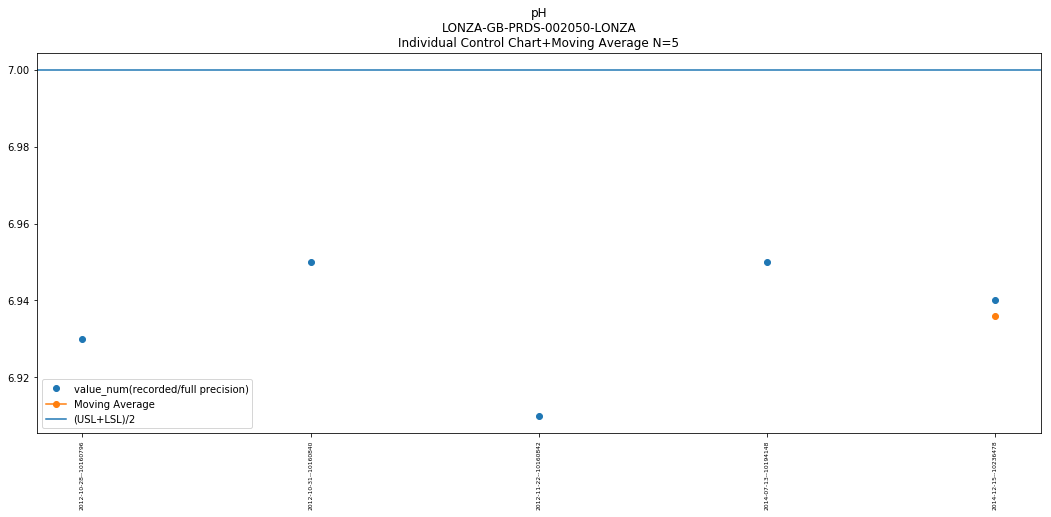

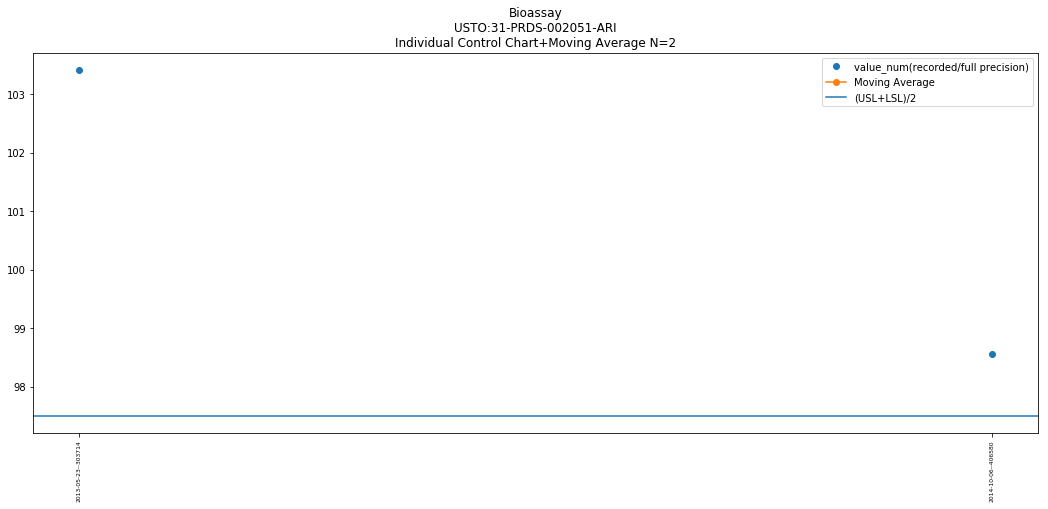

In [48]:
pp = PdfPages('MovingAverageBlincyto-Dec17.pdf')
#plt.figure(figsize=(10,75))
for i in range(len(para_unit_pair_df)):
    
    para=para_unit_pair_df["parameter name"].iloc[i]
    unit=para_unit_pair_df["unit procedure"].iloc[i]
    sub_df=df_quan[(df_quan["parameter name"]==para)&(df_quan["unit procedure"]==unit)].copy()
  
    sub_df=sub_df.sort_values(by=["date of manufacture",'batch number'])
    width=5
    
    moavg=pd.rolling_mean(sub_df['value_num(recorded/full precision)'],window=width)
   
    sample_std=np.std(sub_df['value_num(recorded/full precision)'],ddof=1)
    sample_mean=np.average(sub_df['value_num(recorded/full precision)'])
    indexes=moavg[moavg.notnull()].index
    ual=sub_df["UAL"].iloc[-1]
    lal=sub_df["LAL"].iloc[-1]

    ax=plt.figure(figsize=(18,7))

    plt.plot(sub_df["Mft_Date_Batch"],sub_df['value_num(recorded/full precision)'],"o")
    plt.plot(sub_df["Mft_Date_Batch"].loc[indexes],moavg[indexes],"-o",label="Moving Average")
    if ((ual!=".")&(lal!=".")):
        plt.axhline(y=(ual+lal)/2,label="(USL+LSL)/2")
    
    
    
    #plt.axhline(y=sample_mean+3*sample_std/np.sqrt(width),label="UCL for MA",linestyle="--",color="orange")
    #plt.axhline(y=sample_mean-3*sample_std/np.sqrt(width),label="LCL for MA",linestyle="--",color="orange")

    plt.title(para+"\n"+unit+"\n"+"Individual Control Chart+Moving Average"+" N="+str(len(sub_df)))
    plt.legend()
    #plt.xticks([], [])
    
    #plt.plot(sub_df["Mft_Date_Batch"].iloc[0::10],sub_df['value_num(recorded/full precision)'].iloc[0::10],"o",alpha=0,color="red")
    plt.xticks(rotation=90,fontsize=6)
    #plt.axvline(x=sub_df["Mft_Date_Batch"].iloc[0::2],linewidth=2,linestyle="--")
    plt.savefig(pp, format='pdf',bbox_inches="tight");
pp.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  from ipykernel import kernelapp as app


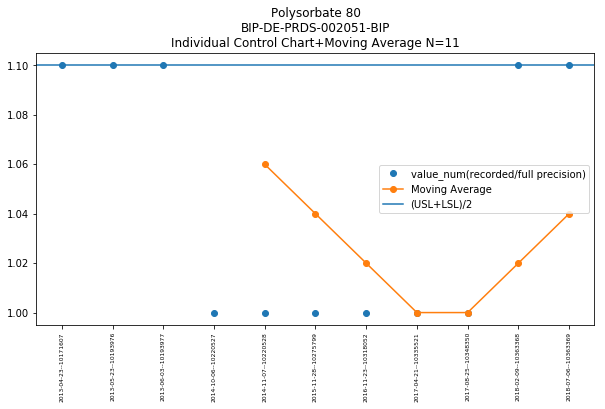

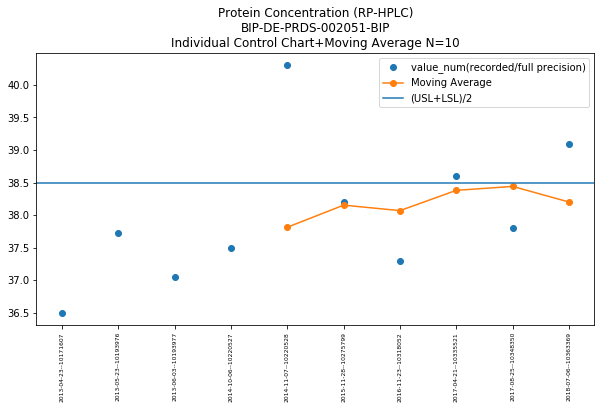

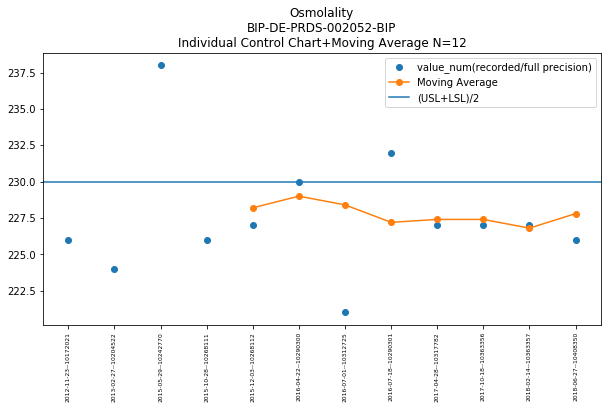

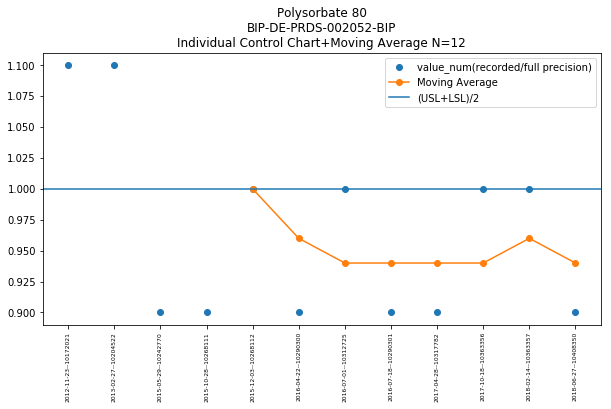

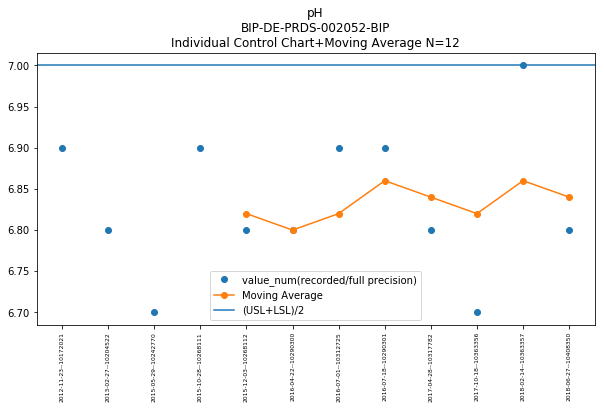

In [55]:
pp = PdfPages('MovingAverageBlincyto-Dec17-10bat.pdf')
#plt.figure(figsize=(10,75))
for i in range(len(para_unit_pair_df)):
    
    para=para_unit_pair_df["parameter name"].iloc[i]
    unit=para_unit_pair_df["unit procedure"].iloc[i]
    sub_df=df_quan[(df_quan["parameter name"]==para)&(df_quan["unit procedure"]==unit)].copy()
  
    sub_df=sub_df.sort_values(by=["date of manufacture",'batch number'])
    if (len(sub_df)<10):
        continue
    
    width=5
    
    moavg=pd.rolling_mean(sub_df['value_num(recorded/full precision)'],window=width)
   
    sample_std=np.std(sub_df['value_num(recorded/full precision)'],ddof=1)
    sample_mean=np.average(sub_df['value_num(recorded/full precision)'])
    indexes=moavg[moavg.notnull()].index
    ual=sub_df["UAL"].iloc[-1]
    lal=sub_df["LAL"].iloc[-1]

    ax=plt.figure(figsize=(10,5))

    plt.plot(sub_df["Mft_Date_Batch"],sub_df['value_num(recorded/full precision)'],"o")
    plt.plot(sub_df["Mft_Date_Batch"].loc[indexes],moavg[indexes],"-o",label="Moving Average")
    if ((ual!=".")&(lal!=".")):
        plt.axhline(y=(ual+lal)/2,label="(USL+LSL)/2")
    
    
    
    #plt.axhline(y=sample_mean+3*sample_std/np.sqrt(width),label="UCL for MA",linestyle="--",color="orange")
    #plt.axhline(y=sample_mean-3*sample_std/np.sqrt(width),label="LCL for MA",linestyle="--",color="orange")

    plt.title(para+"\n"+unit+"\n"+"Individual Control Chart+Moving Average"+" N="+str(len(sub_df)))
    plt.legend()
    #plt.xticks([], [])
    
    #plt.plot(sub_df["Mft_Date_Batch"].iloc[0::10],sub_df['value_num(recorded/full precision)'].iloc[0::10],"o",alpha=0,color="red")
    plt.xticks(rotation=90,fontsize=6)
    #plt.axvline(x=sub_df["Mft_Date_Batch"].iloc[0::2],linewidth=2,linestyle="--")
    plt.savefig(pp, format='pdf',bbox_inches="tight");
pp.close()

pp = PdfPages('MovingAverageEnbrelPRJU:APR14-AML14.pdf')
#plt.figure(figsize=(10,75))

prds="PRDS-002411"
para="pH"
mfg="PRJU:APR14"
test="AML"
mtd="MET-001215"
sub_df=df_quan[(df_quan["parameter detail"]==prds)&(df_quan["parameter name"]==para)&\
               (df_quan['mfg_site_bldg']==mfg)&(df_quan["test site"]==test)].copy()
sub_df=sub_df.sort_values(by=["date of manufacture",'batch number'])

width=20

        
    
moavg=pd.rolling_mean(sub_df['value_num(recorded/full precision)'],window=width)
   
    
sample_mean=np.average(sub_df['value_num(recorded/full precision)'])
indexes=moavg[moavg.notnull()].index
ual=sub_df["UAL"].iloc[-1]
lal=sub_df["LAL"].iloc[-1]

ax=plt.figure(figsize=(18,7))

plt.plot(sub_df["Mft_Date_Batch"],sub_df['value_num(recorded/full precision)'],"o")
plt.plot(sub_df["Mft_Date_Batch"].loc[indexes],moavg[indexes],"-o",label="Moving Average")

plt.axhline(y=sample_mean+3*sample_std/np.sqrt(width),label="UCL for MA",linestyle="--",color="orange")
plt.axhline(y=sample_mean-3*sample_std/np.sqrt(width),label="LCL for MA",linestyle="--",color="orange")

plt.title(prds+"\n"+mtd+"--"+para+"\n"+mfg+"-"+test+"\n"+"Individual Control Chart+Moving Average")
plt.legend()
plt.xticks(rotation=90,fontsize=3)
    
plt.savefig(pp, format='pdf',bbox_inches="tight");
pp.close()

In [5]:
df2["Manufacture Date"]=pd.to_datetime(df2["Manufacture Date"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).std()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6

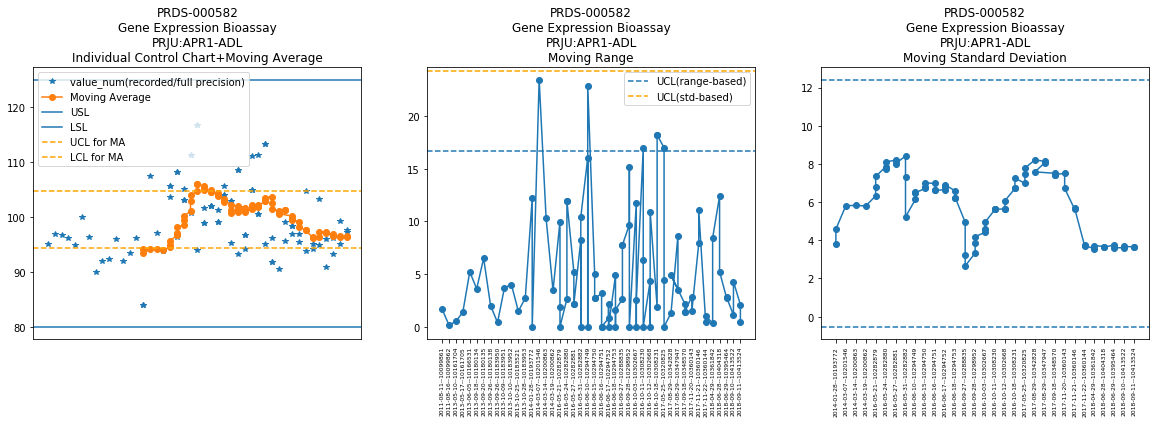

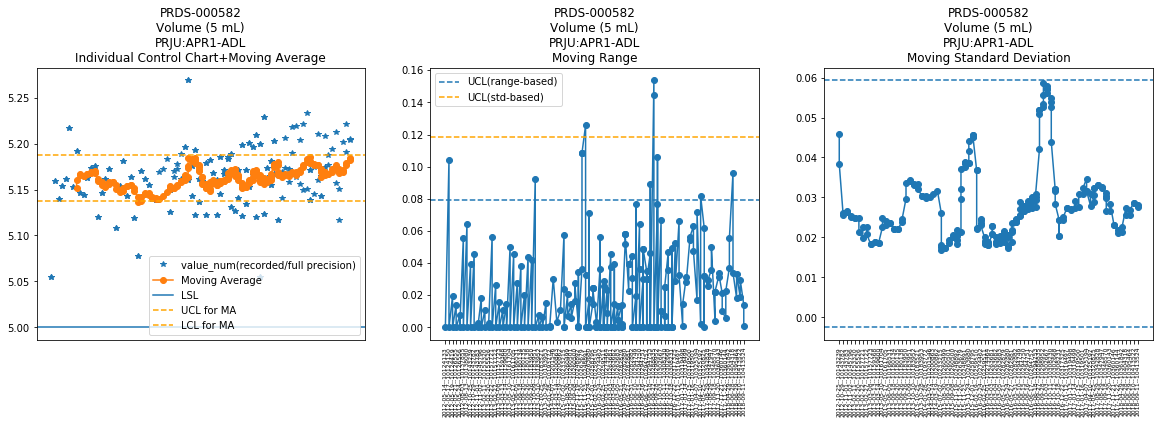

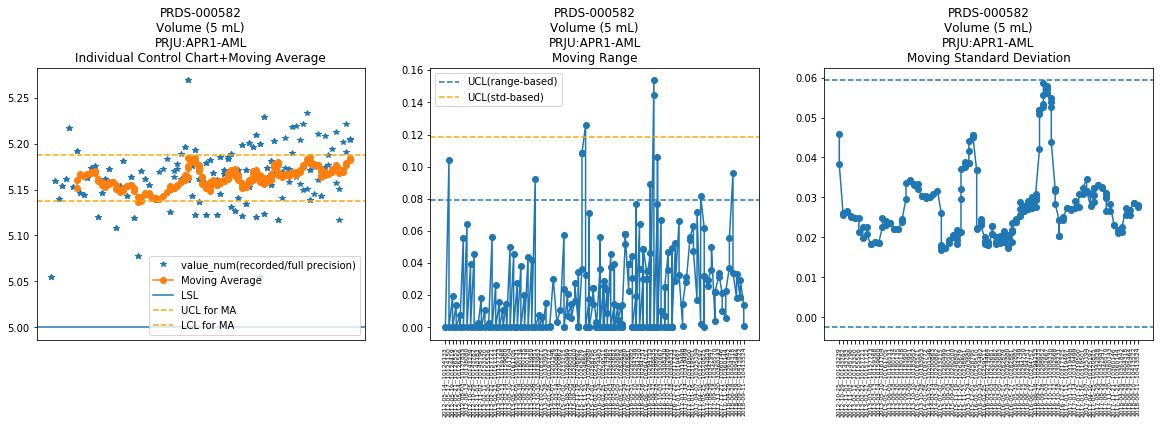

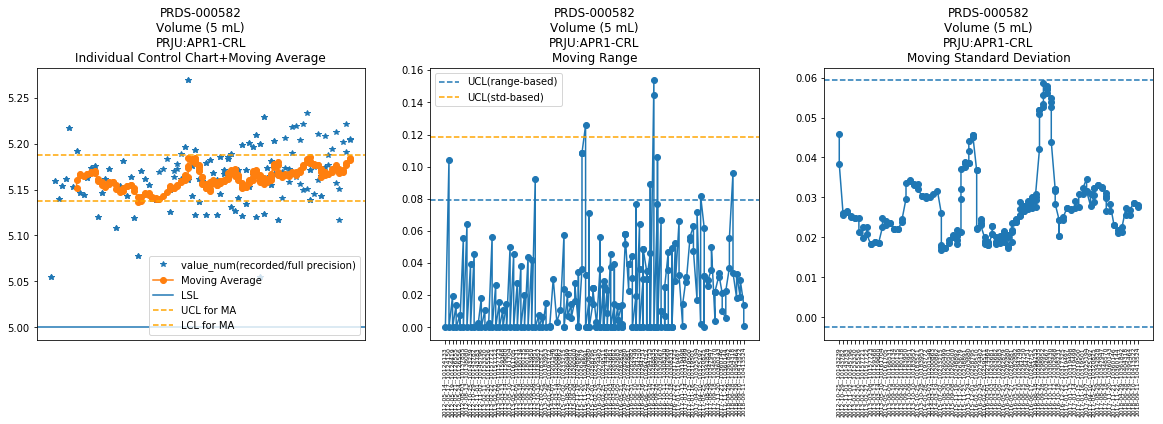

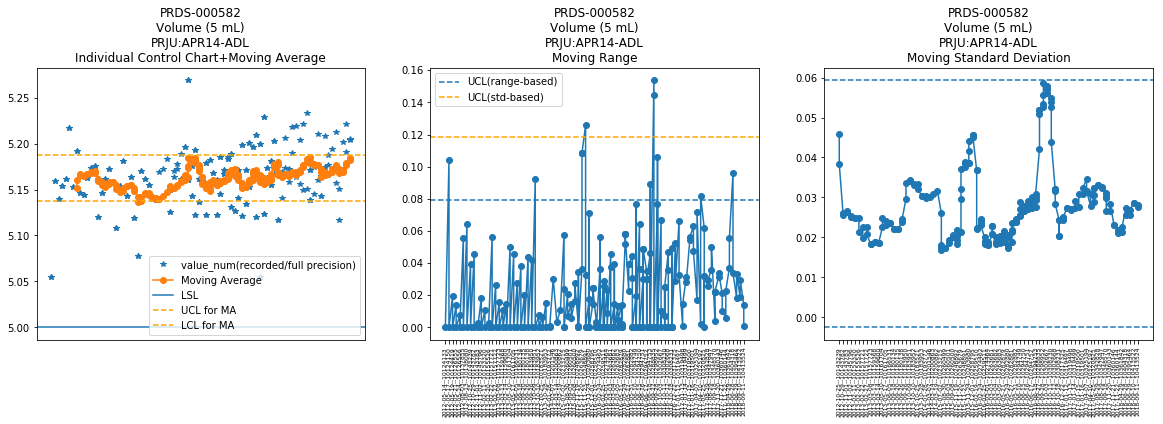

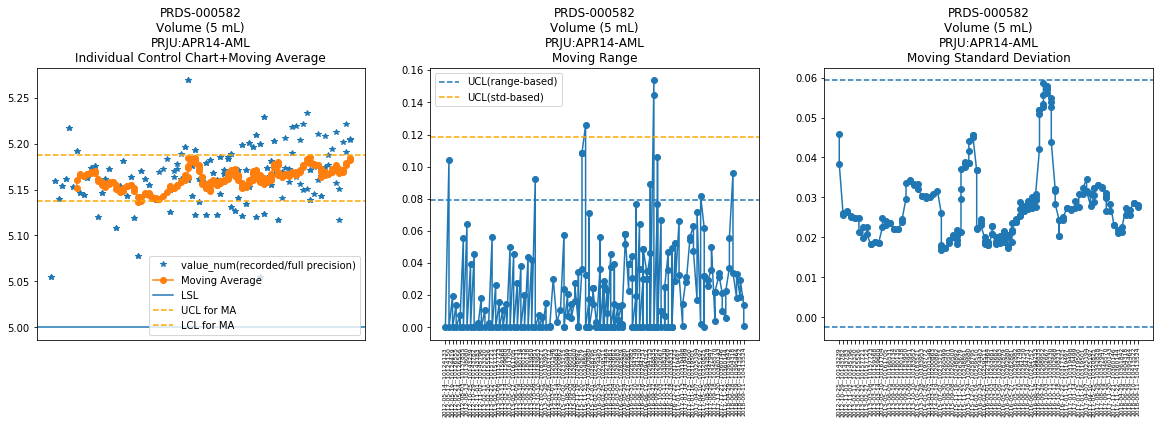

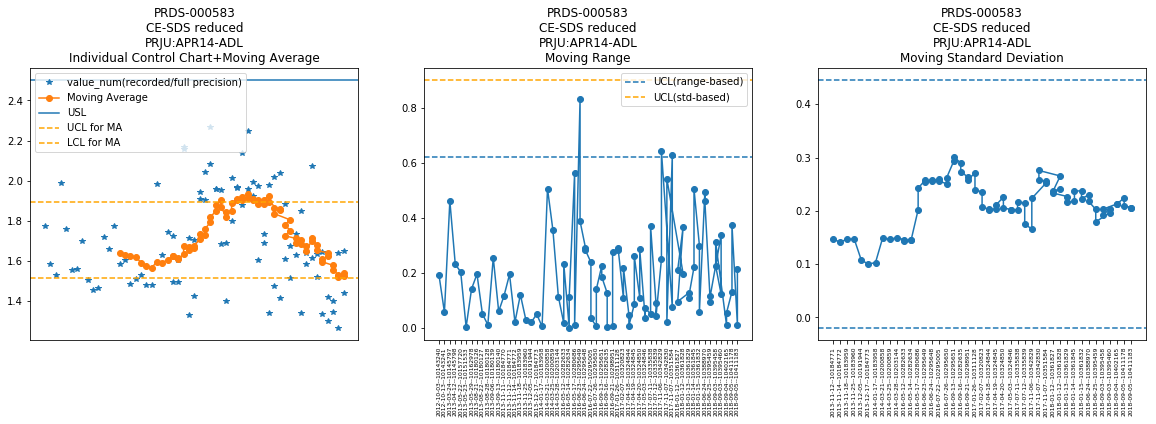

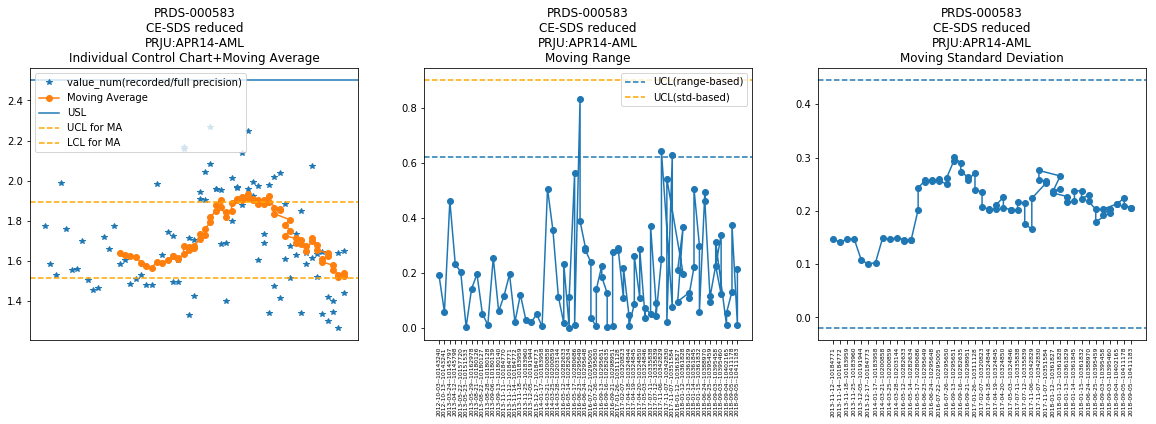

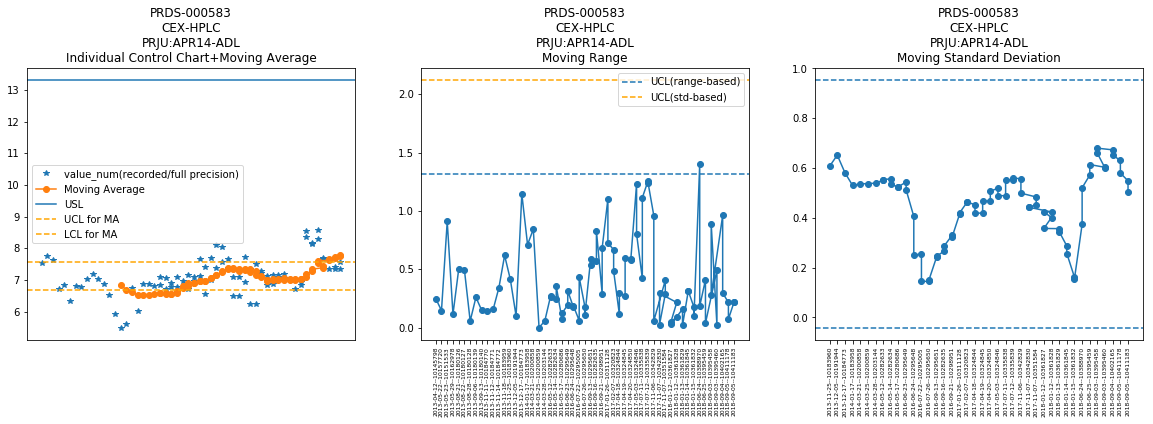

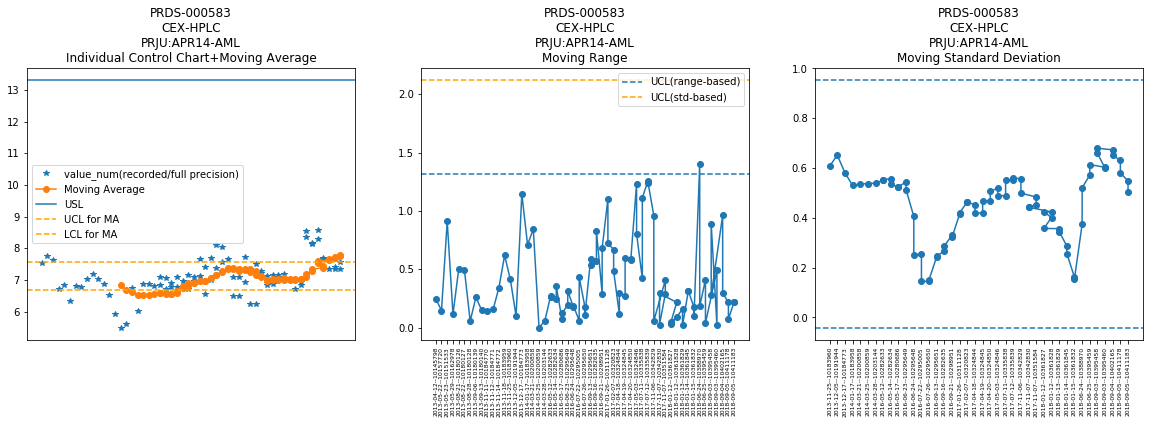

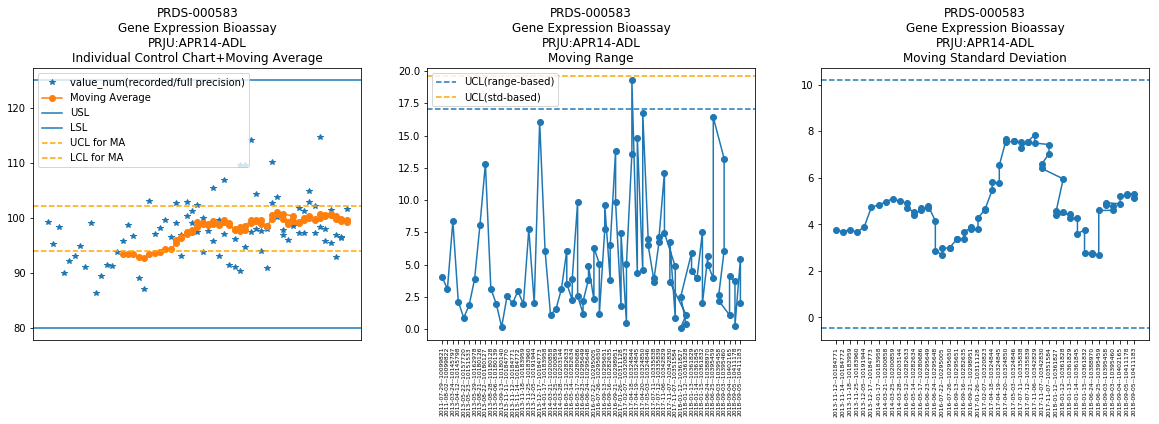

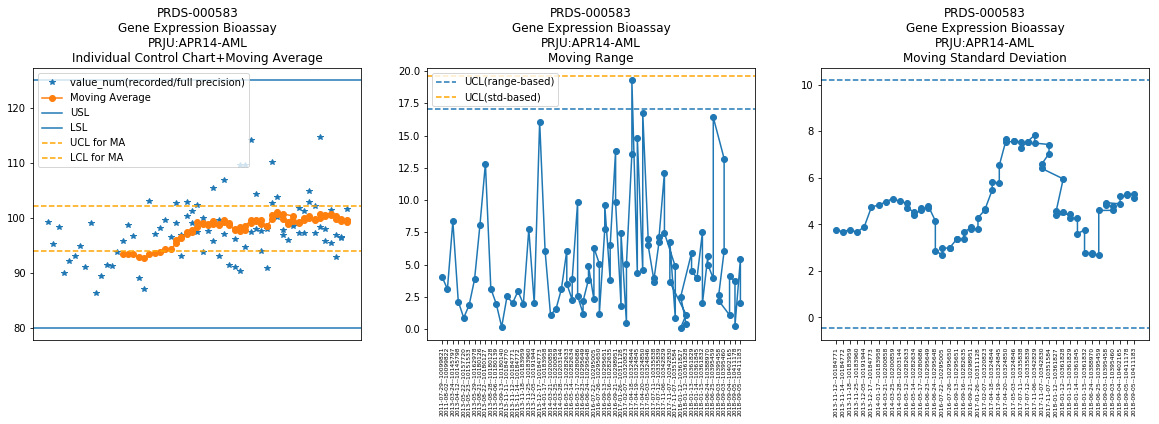

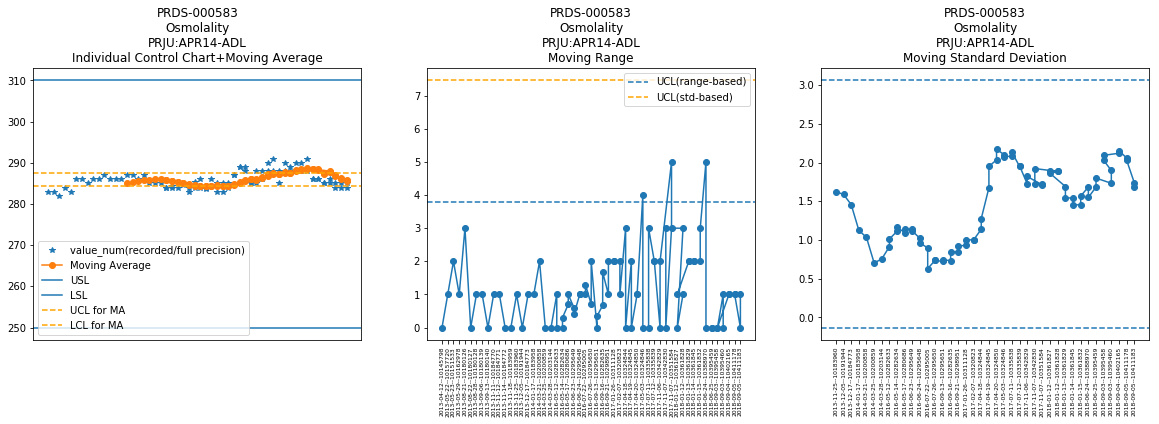

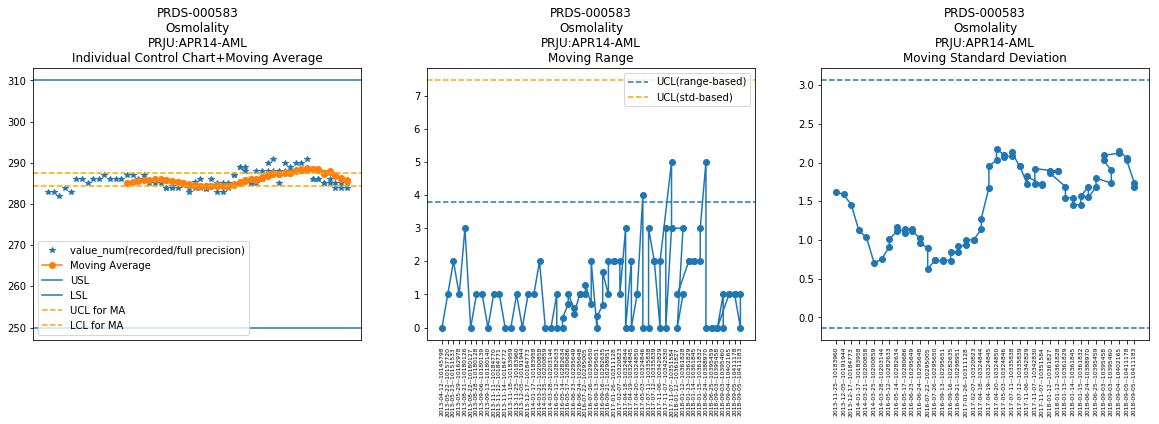

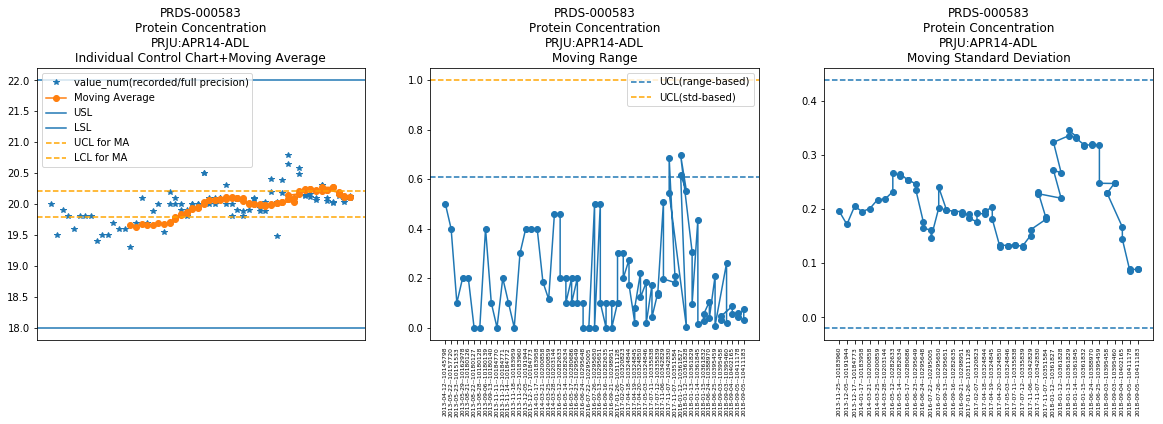

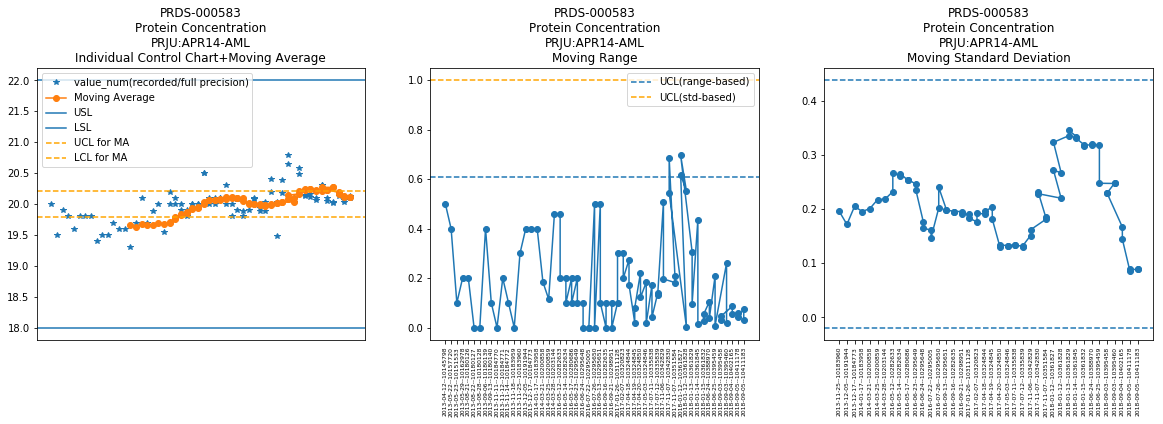

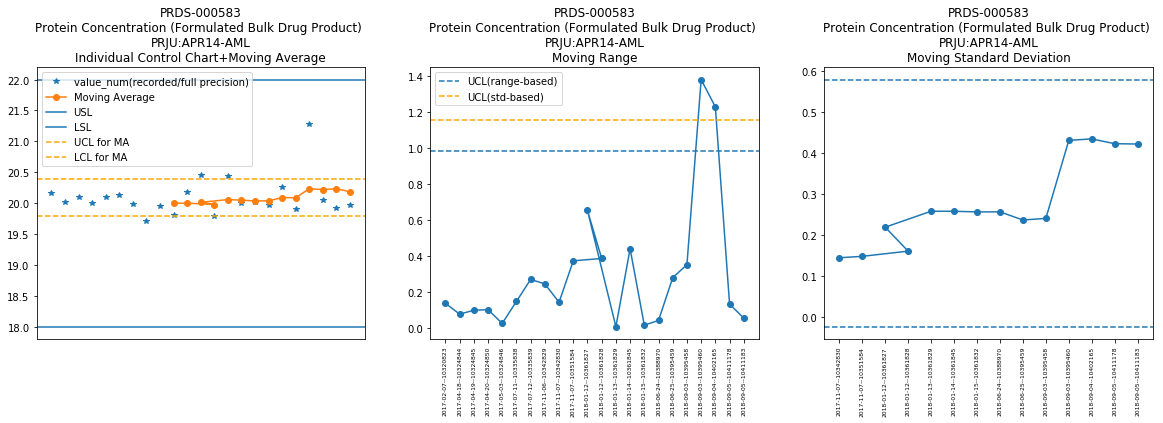

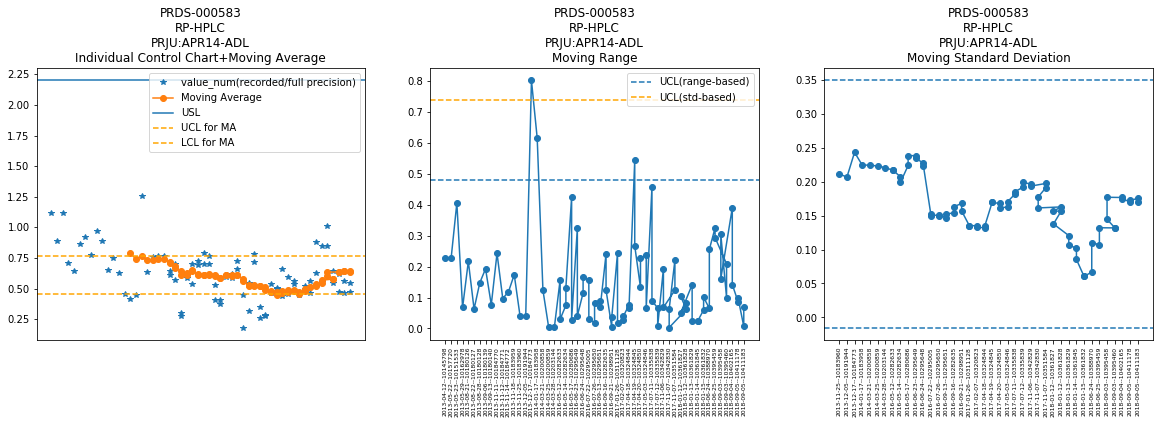

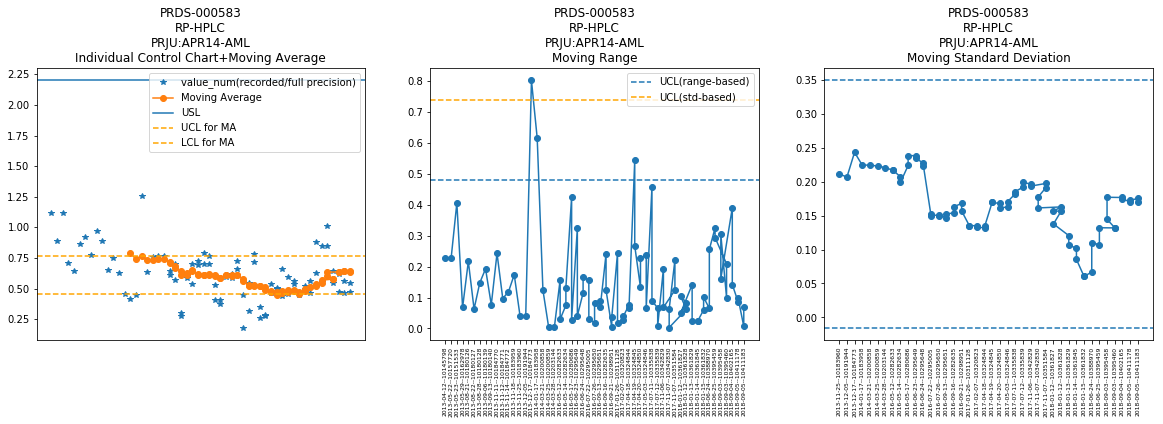

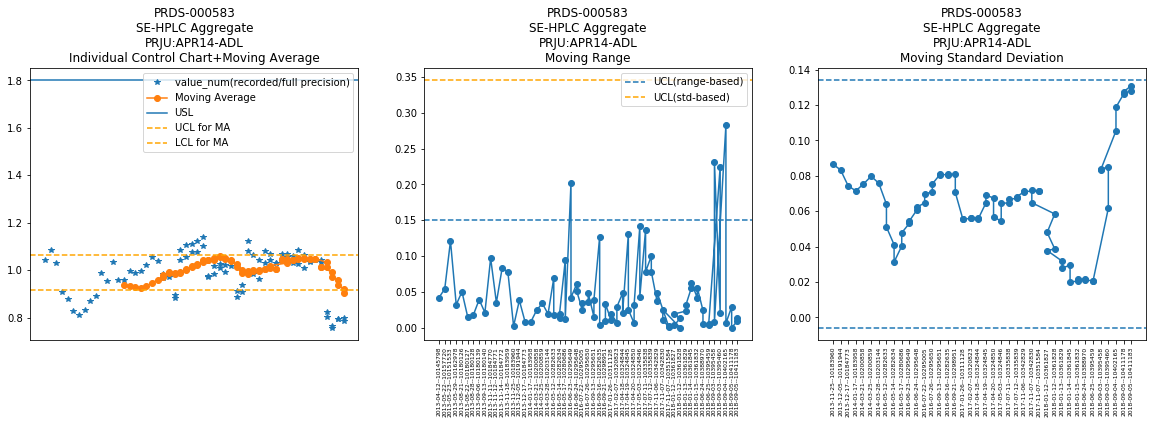

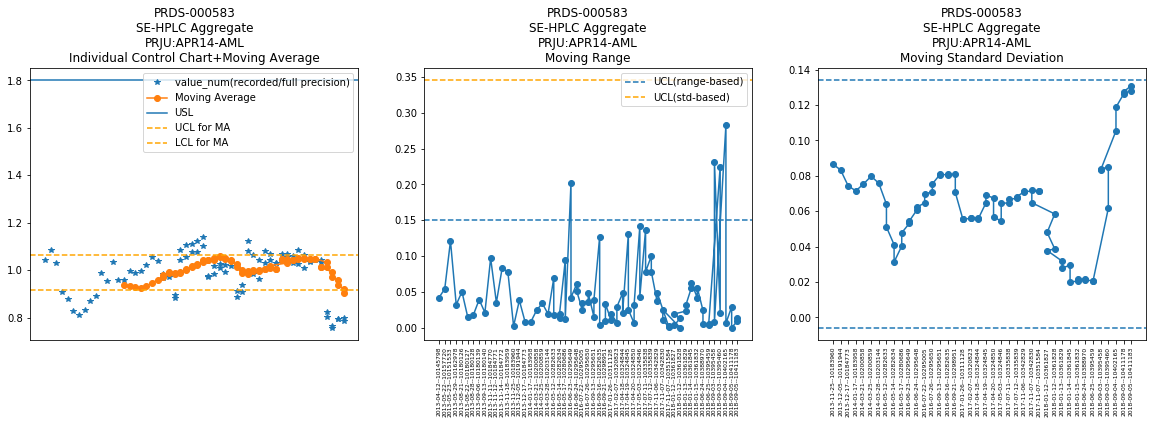

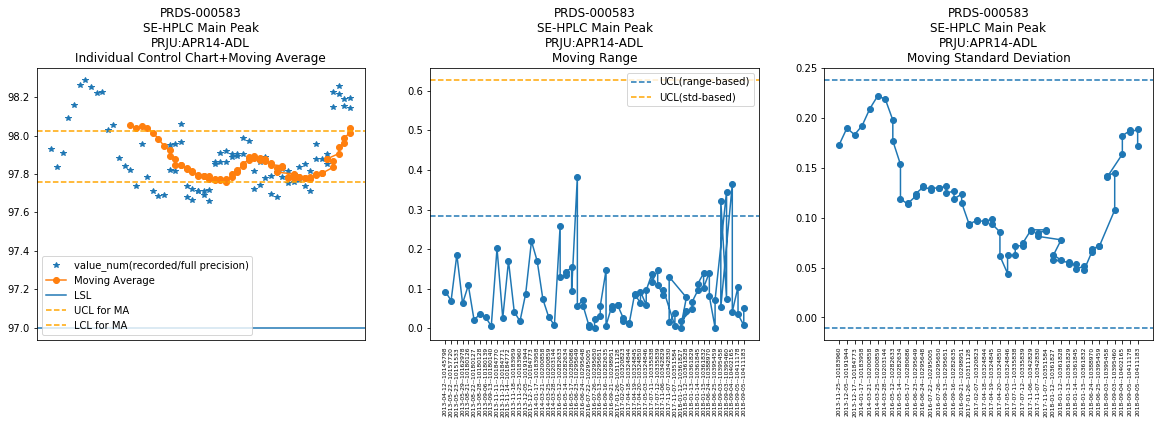

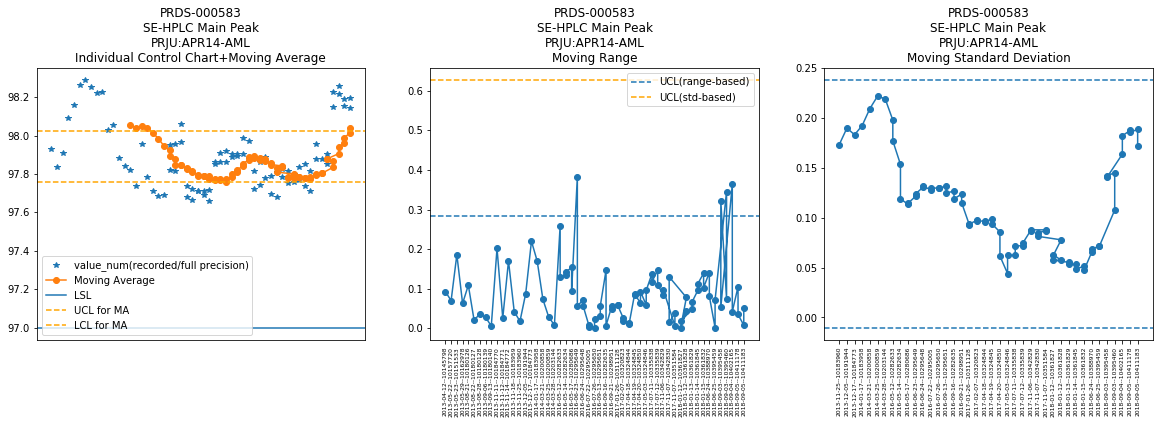

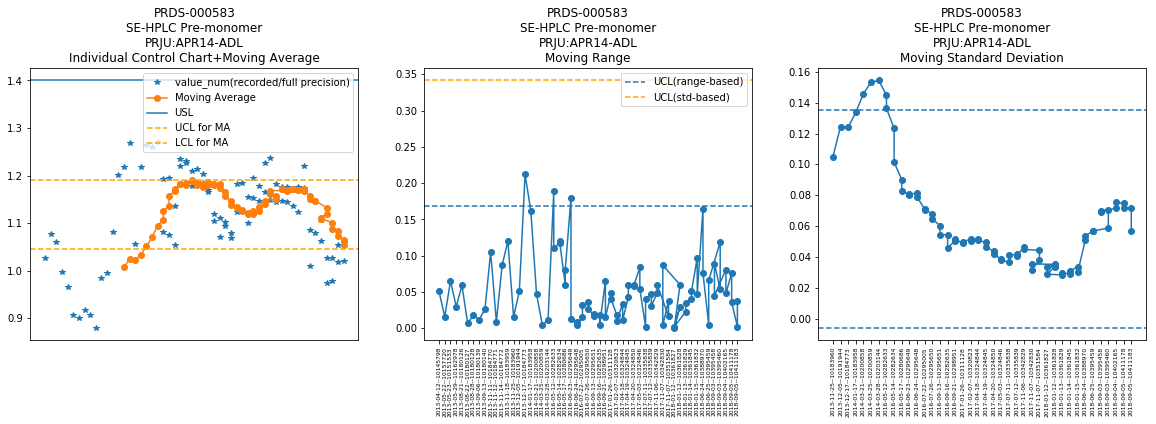

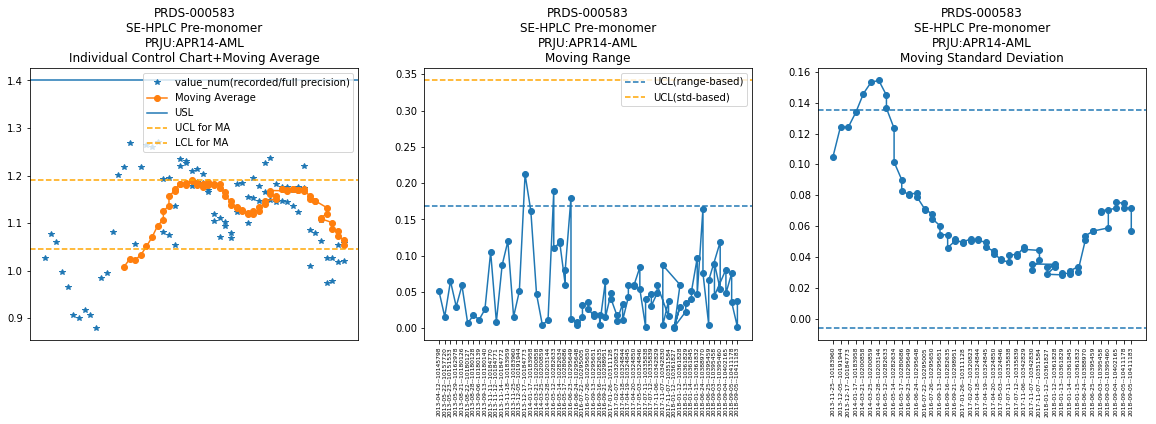

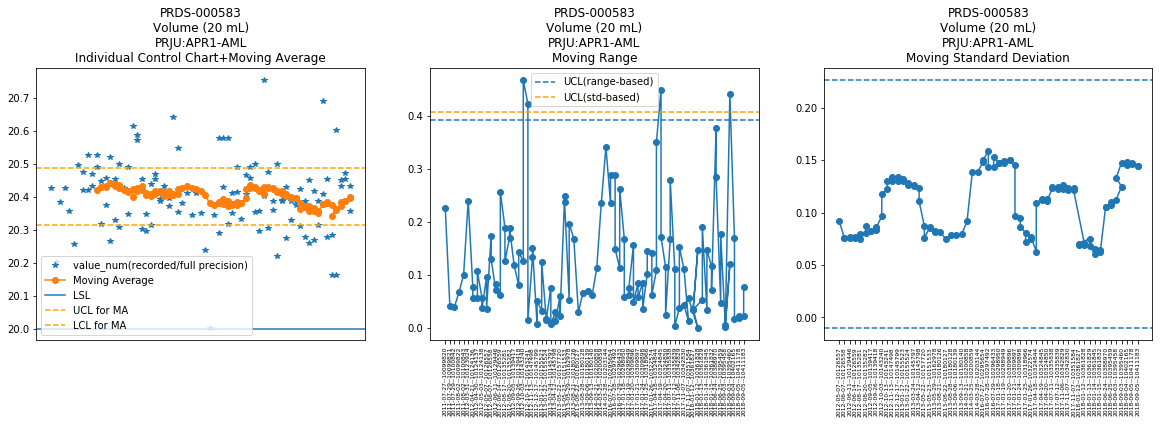

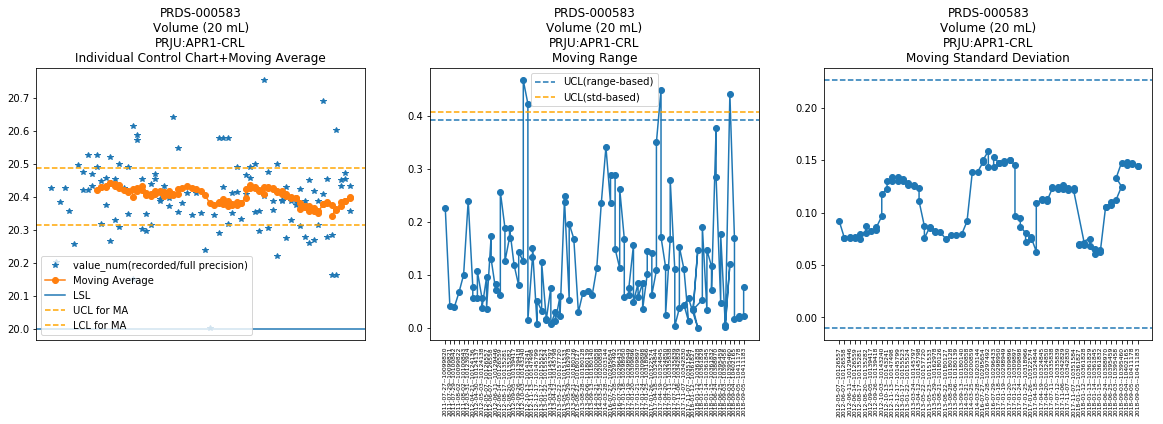

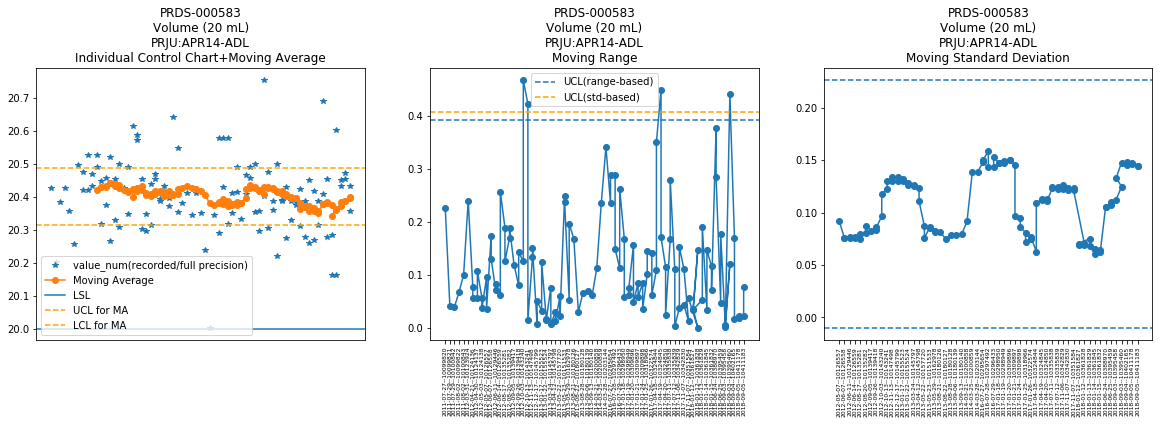

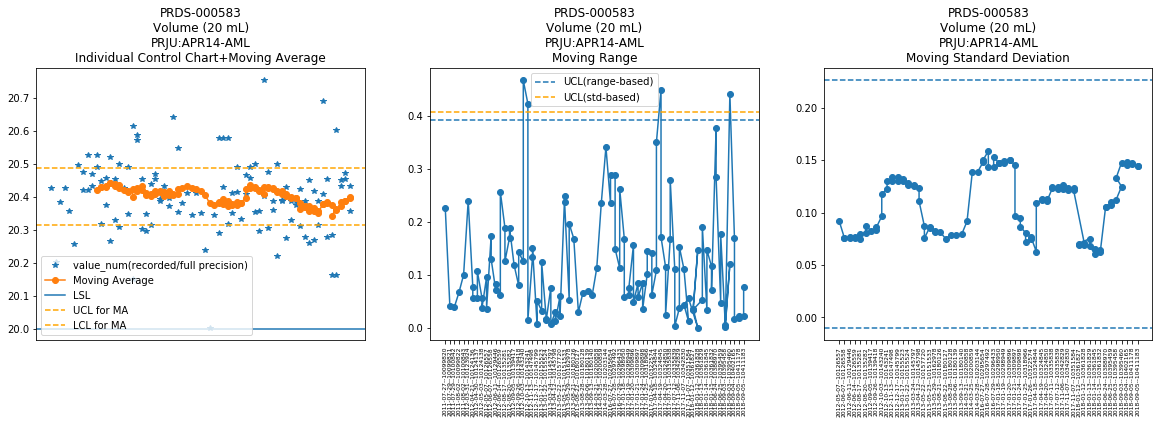

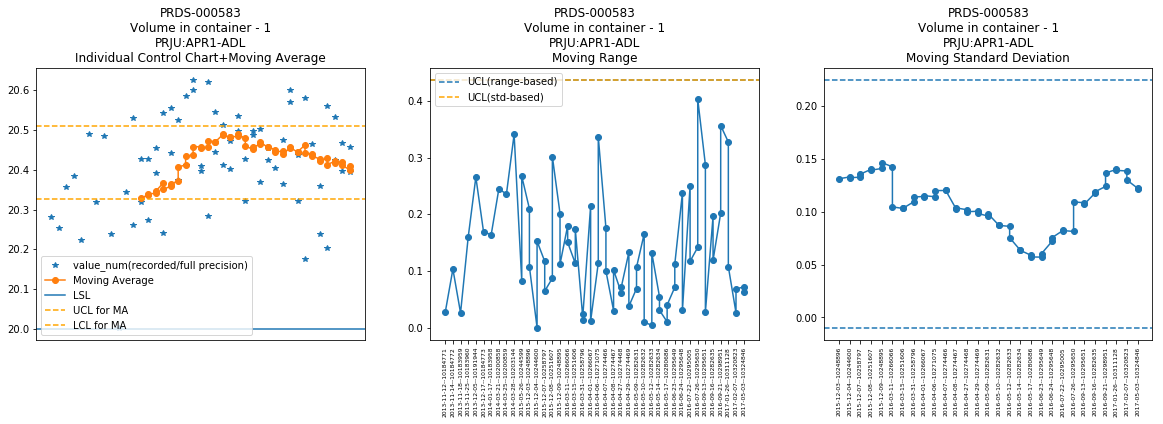

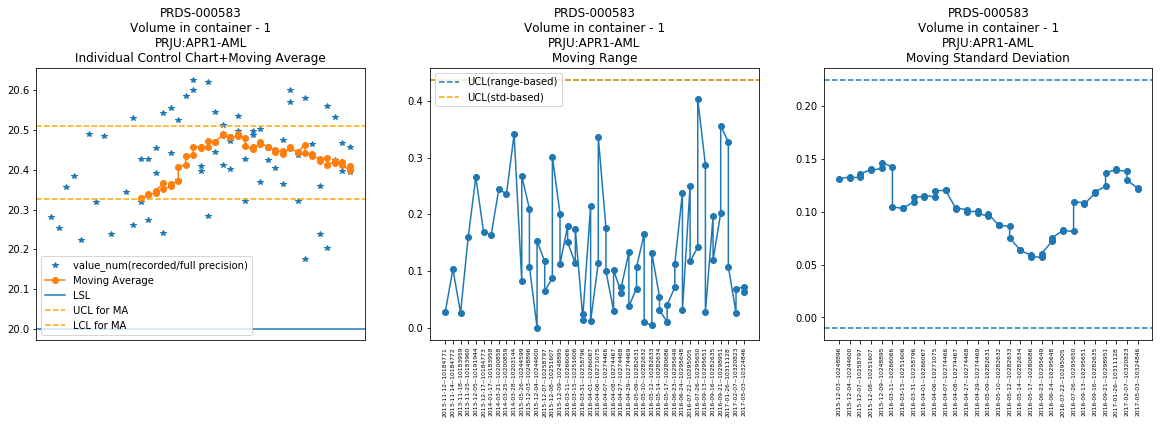

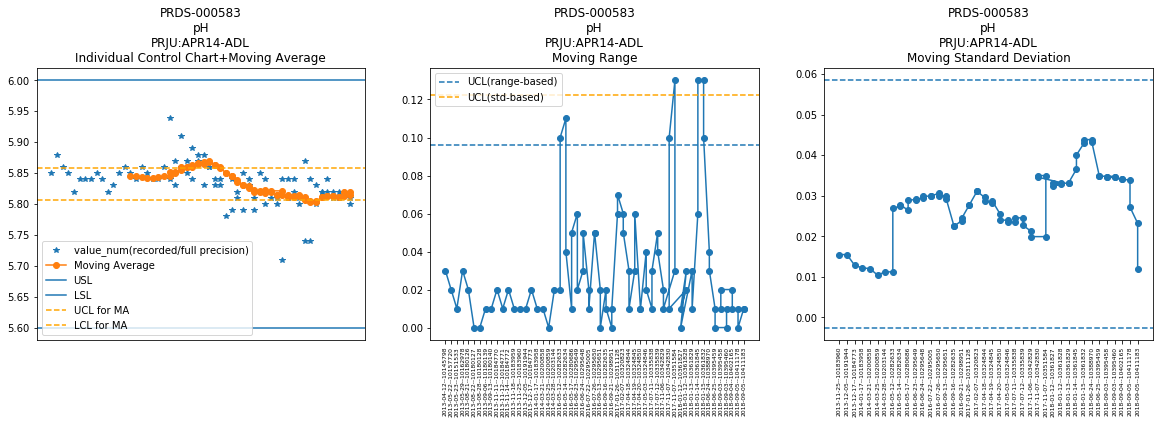

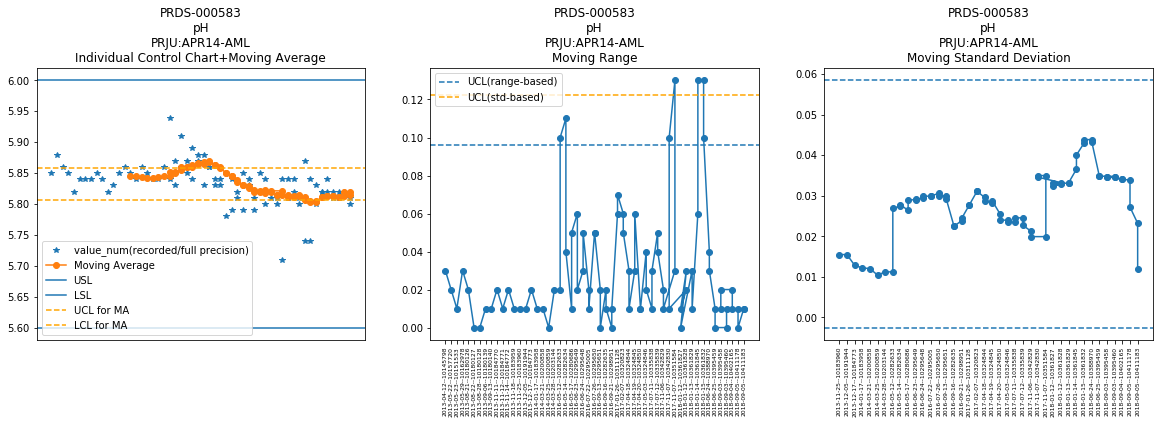

In [31]:
pp = PdfPages('Enbrel.pdf')
#plt.figure(figsize=(10,75))
for i in range(len(combs)):
    prds=combs["parameter detail"].iloc[i]
    para=combs["parameter name"].iloc[i]
    mfg=combs['mfg_site_bldg'].iloc[i]
    test=combs["test site"].iloc[i]
    sub_df=df_quan[(df_quan["parameter detail"]==prds)&(df_quan["parameter name"]==para)&(df_quan["mfg_site_bldg"]==mfg)&\
                  (df_quan["test site"]==test)].copy()
    sub_df=sub_df.sort_values(by=["date of manufacture","batch number"])
    if len(sub_df)>50:
        width=20
    else:
        width=10
    mostd=pd.rolling_std(sub_df['value_num(recorded/full precision)'],window=width)
    moavg=pd.rolling_mean(sub_df['value_num(recorded/full precision)'],window=width)
    mr=np.abs(np.diff(sub_df['value_num(recorded/full precision)']))
    mocv=mostd/moavg*100
    sample_std=np.std(sub_df['value_num(recorded/full precision)'],ddof=1)
    sample_mean=np.average(sub_df['value_num(recorded/full precision)'])
    indexes=mostd[mostd.notnull()].index
    ual=sub_df["UAL"].iloc[-1]
    lal=sub_df["LAL"].iloc[-1]
    #ax=plt.subplot(5,5,i+1)
    ax=plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.plot(sub_df["Mft_Date_Batch"],sub_df['value_num(recorded/full precision)'],"*")
    plt.plot(sub_df["Mft_Date_Batch"].loc[indexes],moavg[indexes],"-o",label="Moving Average")
    if (ual!="."):
        plt.axhline(y=ual,label="USL")
    if(lal!="."):
        plt.axhline(y=lal,label="LSL")  
    plt.axhline(y=sample_mean+3*sample_std/np.sqrt(width),label="UCL for MA",linestyle="--",color="orange")
    plt.axhline(y=sample_mean-3*sample_std/np.sqrt(width),label="LCL for MA",linestyle="--",color="orange")
    
    #plt.xticks([], [])
    plt.xticks(np.arange(len(sub_df["Mft_Date_Batch"]))[0::10],sub_df["Mft_Date_Batch"].iloc[0::10],rotation=90,fontsize=5)
    plt.title(prds+"\n"+para+"\n"+mfg+"-"+test+"\n"+"Individual Control Chart+Moving Average")
    plt.legend()
    #ax.set_title(prds+"\n"+para,fontsize=10)

    
    plt.subplot(1,3,2)
    plt.plot(sub_df["Mft_Date_Batch"].iloc[1:],mr,"-o")
    plt.axhline(y=3.267*np.average(mr),linestyle="--",label="UCL(range-based)")
    plt.axhline(3.678*sample_std,linestyle="--",label="UCL(std-based)",color="orange")
    plt.title(prds+"\n"+para+"\n"+mfg+"-"+test+"\n"+"Moving Range")   
    plt.xticks(rotation=90,fontsize=6)
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(sub_df["Mft_Date_Batch"].loc[indexes],mostd[indexes],"-o")
    plt.axhline(y=np.average(mostd[indexes])+3*np.average(mostd[indexes])*0.363,linestyle="--",label="UCL")
    plt.axhline(y=np.average(mostd[indexes])-3*np.average(mostd[indexes])*0.363,linestyle="--",label="LCL")
    plt.title(prds+"\n"+para+"\n"+mfg+"-"+test+"\n"+"Moving Standard Deviation")

    #plt.title(prds+"\n"+para+"\n"+mfg+"-"+test+"\n"+"Moving Coefficient of Variation(%)")
    
    plt.xticks(rotation=90,fontsize=6)
    
    plt.savefig(pp, format='pdf',bbox_inches="tight");
pp.close()